# Top 5 Tech Cities worth Investing

**Authors**: Alice Agrawal, Jordan Kominsky, Kyongmin So, Tyler Wood, Hanis Zulmuthi

***May 2022***

## Overview

## Business Understanding

## Data Understanding

### Home Price
**Source**: 

**Contents**: 

### 2017 Median Income
**Source**: 

**Contents**:

# Data Cleaning & Preparation

## Import packages

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
from datetime import datetime as dt

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#modeling
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

#warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

## Load home price data

In [2]:
df = pd.read_csv('Data/zillow_data.csv')
df

RegionID  RegionName                 City State              Metro  \
0         84654       60657              Chicago    IL            Chicago   
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO                NaN   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0           Cook         1  334200.0  335400.0  336500.0  ...  1005500   
1         Collin         2  235700.0  236900.0  236700.0  ...   308000   
2         Harris         3  210400.0  212200.0  212200.0  ...   321000   
3           Cook         4  498100.0  500900.0  503100.0  ...  1289800   
4        El Paso         5   77300.0   77300.0   77300.0  ...   119100   
...          ...       ...       ...       ...       ...  ...      ...   
14718   Franklin     14719   94600.0   94300.0   94000.0  ...   216800   
14719    Grafton     14720   92700.0   92500.0   92400.0  ...   202100   
14720    Madison     14721   57100.0   57300.0   57500.0  ...   121800   
14721   Gunnison     14722  191100.0  192400.0  193700.0  ...   662800   
14722      Clark     14723  176400.0  176300.0  176100.0  ...   333800   

       2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
0      1007500  1007800  1009600  1013300  1018700  1024400  1030700  1033800   
1       310000   312500   314100   315000   316600   318100   319600   321100   
2       320600   320200   320400   320800   321200   321200   323000   326900   
3      1287700  1287400  1291500  1296600  1299000  1302700  1306400  1308500   
4       119400   120000   120300   120300   120300   120300   120500   121000   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14718   217700   218600   218500   218100   216400   213100   209800   209200   
14719   208400   212200   215200   214300   213100   213700   218300   222700   
14720   122800   124600   126700   128800   130600   131700   132500   133000   
14721   671200   682400   695600   695500   694700   706400   705300   681500   
14722   336400   339700   343800   346800   348900   350400   353000   356000   

       2018-04  
0      1030600  
1       321800  
2       329900  
3      1307000  
4       121500  
...        ...  
14718   209300  
14719   225800  
14720   133400  
14721   664400  
14722   357200  

[14723 rows x 272 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [4]:
df.columns[:100]

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08',
       '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02',
       '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08',
       '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02',
       '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08',
       '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02',
       '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08',
       '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02',
       '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08',
       '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02',
       '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08',
       '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02',
       '2002-03', '2002-04', '2002-05', '2002-06',

Since there are a lot of cities of the same name in multiple states, let's create a column that identifies the cities from the state unique by specifying which state the city belongs to.

In [5]:
#Combine city and state
df['Geolocate'] = df['City'] + ', ' + df['State']


In [6]:
# Sniff test
df[df.Geolocate == 'Washington, DC']

RegionID  RegionName        City State       Metro  \
29       66126       20002  Washington    DC  Washington   
33       66133       20009  Washington    DC  Washington   
181      66135       20011  Washington    DC  Washington   
246      66142       20019  Washington    DC  Washington   
258      66125       20001  Washington    DC  Washington   
402      66143       20020  Washington    DC  Washington   
1263     66132       20008  Washington    DC  Washington   
1448     66127       20003  Washington    DC  Washington   
1707     66151       20032  Washington    DC  Washington   
2066     66139       20016  Washington    DC  Washington   
2581     66134       20010  Washington    DC  Washington   
2653     66131       20007  Washington    DC  Washington   
5297     66146       20024  Washington    DC  Washington   
5339     66140       20017  Washington    DC  Washington   
5453     66141       20018  Washington    DC  Washington   
5805     66155       20037  Washington    DC  Washington   
6484     66138       20015  Washington    DC  Washington   
6887     66136       20012  Washington    DC  Washington   

                CountyName  SizeRank   1996-04   1996-05   1996-06  ...  \
29    District of Columbia        30   94300.0   94000.0   93700.0  ...   
33    District of Columbia        34  178800.0  179200.0  179600.0  ...   
181   District of Columbia       182  118900.0  118500.0  118200.0  ...   
246   District of Columbia       247   91300.0   91000.0   90600.0  ...   
258   District of Columbia       259   92000.0   92600.0   93200.0  ...   
402   District of Columbia       403  104500.0  103800.0  103000.0  ...   
1263  District of Columbia      1264  450100.0  448200.0  446300.0  ...   
1448  District of Columbia      1449  130000.0  130100.0  130200.0  ...   
1707  District of Columbia      1708   85700.0   85500.0   85400.0  ...   
2066  District of Columbia      2067  362000.0  361200.0  360300.0  ...   
2581  District of Columbia      2582  110500.0  111200.0  112000.0  ...   
2653  District of Columbia      2654  358100.0  356000.0  353900.0  ...   
5297  District of Columbia      5298  209800.0  208200.0  206600.0  ...   
5339  District of Columbia      5340  121700.0  121400.0  121200.0  ...   
5453  District of Columbia      5454  123000.0  122400.0  121800.0  ...   
5805  District of Columbia      5806  277800.0  275800.0  273700.0  ...   
6484  District of Columbia      6485  312400.0  311000.0  309800.0  ...   
6887  District of Columbia      6888  185000.0  184900.0  184700.0  ...   

      2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
29     668000   672200   673100   674600   678200   680900   683000   687500   
33    1027500  1034300  1040500  1047400  1055400  1065900  1076400  1081000   
181    586200   591200   593200   591200   589500   590800   599100   611400   
246    296300   302500   306700   308800   310800   313400   314100   311800   
258    768800   771200   773300   777600   780500   781600   785500   791400   
402    317600   321800   324500   324800   324900   324900   327300   332800   
1263  1508800  1509700  1506000  1509100  1514300  1519400  1527900  1539600   
1448   807200   811900   813400   814600   814600   815300   817300   820200   
1707   293400   297800   301500   303700   304000   304600   306800   308200   
2066  1198700  1196400  1190400  1184800  1183600  1186600  1190000  1196000   
2581   741700   750900   756300   759300   761800   763500   767800   774700   
2653  1330800  1324900  1314100  1303500  1296500  1293000  1291200  1291000   
5297   866900   860100   864500   874100   878200   882300   885500   886900   
5339   534300   535300   535600   532600   531000   534400   542300   548400   
5453   535200   534700   533100   534500   538700   542200   548300   553800   
5805   914900   918700   923400   938900   953100   967600   990100  1013500   
6484  1004000  1005300  1003700  1002900  1003600  1004400  1006400  1007200   

### Mask data to cities of interest

We're interested in looking at the housing market of major [tech cities](https://www.indeed.com/career-advice/finding-a-job/top-cities-for-tech-jobs-2020) in the US. Let's filter our data to these cities.

In [7]:
city_list = ['Washington, DC','New York, NY','San Francisco, CA','Seattle, WA',\
             'Dallas, TX','Los Angeles, CA','San Jose, CA','Chicago, IL','Baltimore, MD','Boston, MA']

In [15]:
df_cities = df[df.Geolocate.isin(city_list)]
df_cities.head()

RegionID  RegionName           City State          Metro     CountyName  \
0     84654       60657        Chicago    IL        Chicago           Cook   
3     84616       60614        Chicago    IL        Chicago           Cook   
6     61807       10467       New York    NY       New York          Bronx   
7     84640       60640        Chicago    IL        Chicago           Cook   
9     97564       94109  San Francisco    CA  San Francisco  San Francisco   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-08  2017-09  2017-10  \
0         1  334200.0  335400.0  336500.0  ...  1007500  1007800  1009600   
3         4  498100.0  500900.0  503100.0  ...  1287700  1287400  1291500   
6         7  152900.0  152700.0  152600.0  ...   400000   407300   411600   
7         8  216500.0  216700.0  216900.0  ...   787100   776100   774900   
9        10  766000.0  771100.0  776500.0  ...  3763900  3775000  3799700   

   2017-11  2017-12  2018-01  2018-02  2018-03  2018-04          Geolocate  
0  1013300  1018700  1024400  1030700  1033800  1030600        Chicago, IL  
3  1296600  1299000  1302700  1306400  1308500  1307000        Chicago, IL  
6   413200   414300   413900   411400   413200   417900       New York, NY  
7   777900   777900   778500   780500   782800   782800        Chicago, IL  
9  3793900  3778700  3770800  3763100  3779800  3813500  San Francisco, CA  

[5 rows x 273 columns]

## Pull 2017 Median Income data

Let's take a look at the median income at these major tech cities. For this, we'll be pulling 2017 median income data from [Kaggle](https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations?select=Income_Methodology.pdf).

In [20]:
#Load data
df_income = pd.read_csv('Data/kaggle_income.csv',
                       encoding = 'ISO-8859-1')

#Combine city and state
df_income['Geolocate'] = df_income['City'] + ', ' + df_income['State_ab']

#Mask dataframe to cities of interest
df_income = df_income[df_income.Geolocate.isin(city_list)]
df_income

id  State_Code  State_Name State_ab              County  \
1735    6013318           6  California       CA  Los Angeles County   
2012   60212459           6  California       CA      Alameda County   
2013   60212469           6  California       CA      Alameda County   
2014   60212479           6  California       CA      Alameda County   
2015   60212489           6  California       CA      Alameda County   
...         ...         ...         ...      ...                 ...   
30867   5302409          53  Washington       WA        Adams County   
30878   5302419          53  Washington       WA        Adams County   
30889   5302429          53  Washington       WA        Adams County   
31011   5302539          53  Washington       WA        Adams County   
31114   5302699          53  Washington       WA        Adams County   

              City         Place   Type Primary  Zip_Code Area_Code    ALand  \
1735   Los Angeles      Westmont    CDP   place     90047       323  4785352   
2012   Los Angeles  Alameda city  Track   Track     90041       323  4107036   
2013   Los Angeles  Alameda city  Track   Track     90041       323  1094425   
2014   Los Angeles  Alameda city  Track   Track     90042       323   535234   
2015   Los Angeles  Alameda city  Track   Track     90042       323   485332   
...            ...           ...    ...     ...       ...       ...      ...   
30867      Seattle        Hatton  Track   Track     98118       206  2783287   
30878      Seattle        Hatton  Track   Track     98108       206  1070775   
30889      Seattle        Hatton  Track   Track     98118       206  3506716   
31011      Seattle        Hatton  Track   Track     98126       206  1160397   
31114      Seattle        Hatton  Track   Track     98146       206        0   

          AWater        Lat         Lon    Mean  Median  Stdev        sum_w  \
1735           0  33.941679 -118.301838   39928   26090  41109  7649.302158   
2012       30513  34.145267 -118.204386   88527   59408  72801   206.020316   
2013           0  34.134781 -118.192851  106443   86878  81571   170.322969   
2014           0  34.119972 -118.189286   56625   49009  36976   270.156337   
2015           0  34.121666 -118.209226   65014   46199  60243   273.520535   
...          ...        ...         ...     ...     ...    ...          ...   
30867    1396979  47.555977 -122.265750   99369   85368  65621   780.283702   
30878          0  47.538359 -122.286204   47899   28094  51251  1143.971756   
30889          0  47.520170 -122.282850   69658   60039  54538   930.085090   
31011          0  47.512846 -122.363268   74622   65411  47653   430.775298   
31114  239607761  47.510648 -122.415421       0       0      0     0.000000   

             Geolocate  
1735   Los Angeles, CA  
2012   Los Angeles, CA  
2013   Los Angeles, CA  
2014   Los Angeles, CA  
2015   Los Angeles, CA  
...                ...  
30867      Seattle, WA  
30878      Seattle, WA  
30889      Seattle, WA  
31011      Seattle, WA  
31114      Seattle, WA  

[1227 rows x 20 columns]

<AxesSubplot:xlabel='Median', ylabel='Count'>

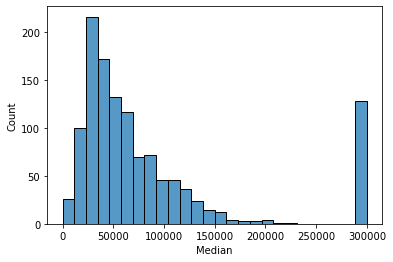

In [21]:
#Look at distribution of 2017 median income 

sns.histplot(df_income['Median'])

In [22]:
df_income.describe()

id   State_Code      Zip_Code         ALand        AWater  \
count  1.227000e+03  1227.000000   1227.000000  1.227000e+03  1.227000e+03   
mean   6.428769e+07    21.402608  60256.520782  1.881765e+06  3.313473e+05   
std    1.032249e+08    15.223327  31795.355730  1.750294e+07  6.917771e+06   
min    1.101200e+04     6.000000   2111.000000  0.000000e+00  0.000000e+00   
25%    1.702394e+07     6.000000  21221.000000  3.307440e+05  0.000000e+00   
50%    2.402528e+07    17.000000  60647.000000  6.745220e+05  0.000000e+00   
75%    6.021341e+07    36.000000  90034.000000  1.337892e+06  0.000000e+00   
max    4.802131e+08    53.000000  98199.000000  5.888084e+08  2.396078e+08   

               Lat          Lon           Mean         Median          Stdev  \
count  1227.000000  1227.000000    1227.000000    1227.000000    1227.000000   
mean     38.731672   -96.637755   74328.420538   83886.340668   53879.555012   
std       3.876569    18.901290   38142.665762   81792.355697   20528.416491   
min      29.659982  -122.510436       0.000000       0.000000       0.000000   
25%      34.088205  -118.304154   43791.500000   32824.000000   37546.500000   
50%      39.302056   -87.733943   65069.000000   54857.000000   53365.000000   
75%      41.781700   -76.955035   98983.500000   95948.000000   71082.500000   
max      47.730188   -71.054128  206380.000000  300000.000000  103836.000000   

               sum_w  
count    1227.000000  
mean     1051.350246  
std     17852.654704  
min         0.000000  
25%       194.785034  
50%       314.086381  
75%       566.773104  
max    612241.922964

In [24]:
df_income['Median'].median()

54857.0

The distribution of the median income in the major tech cities is skewed to left. Interesting that the median of the 2017 median income is ~$55000. I expected the median of median income in the major tech cities to be higher.

There also seemed to be a lot of erroneous median income values equal to exactly $300,000 for many cities, so I removed those.

In [25]:
# Remove rows with median income is $300000
df_income = df_income[df_income['Median'] != 300000]
df_income

id  State_Code  State_Name State_ab              County  \
1735    6013318           6  California       CA  Los Angeles County   
2012   60212459           6  California       CA      Alameda County   
2013   60212469           6  California       CA      Alameda County   
2014   60212479           6  California       CA      Alameda County   
2015   60212489           6  California       CA      Alameda County   
...         ...         ...         ...      ...                 ...   
30867   5302409          53  Washington       WA        Adams County   
30878   5302419          53  Washington       WA        Adams County   
30889   5302429          53  Washington       WA        Adams County   
31011   5302539          53  Washington       WA        Adams County   
31114   5302699          53  Washington       WA        Adams County   

              City         Place   Type Primary  Zip_Code Area_Code    ALand  \
1735   Los Angeles      Westmont    CDP   place     90047       323  4785352   
2012   Los Angeles  Alameda city  Track   Track     90041       323  4107036   
2013   Los Angeles  Alameda city  Track   Track     90041       323  1094425   
2014   Los Angeles  Alameda city  Track   Track     90042       323   535234   
2015   Los Angeles  Alameda city  Track   Track     90042       323   485332   
...            ...           ...    ...     ...       ...       ...      ...   
30867      Seattle        Hatton  Track   Track     98118       206  2783287   
30878      Seattle        Hatton  Track   Track     98108       206  1070775   
30889      Seattle        Hatton  Track   Track     98118       206  3506716   
31011      Seattle        Hatton  Track   Track     98126       206  1160397   
31114      Seattle        Hatton  Track   Track     98146       206        0   

          AWater        Lat         Lon    Mean  Median  Stdev        sum_w  \
1735           0  33.941679 -118.301838   39928   26090  41109  7649.302158   
2012       30513  34.145267 -118.204386   88527   59408  72801   206.020316   
2013           0  34.134781 -118.192851  106443   86878  81571   170.322969   
2014           0  34.119972 -118.189286   56625   49009  36976   270.156337   
2015           0  34.121666 -118.209226   65014   46199  60243   273.520535   
...          ...        ...         ...     ...     ...    ...          ...   
30867    1396979  47.555977 -122.265750   99369   85368  65621   780.283702   
30878          0  47.538359 -122.286204   47899   28094  51251  1143.971756   
30889          0  47.520170 -122.282850   69658   60039  54538   930.085090   
31011          0  47.512846 -122.363268   74622   65411  47653   430.775298   
31114  239607761  47.510648 -122.415421       0       0      0     0.000000   

             Geolocate  
1735   Los Angeles, CA  
2012   Los Angeles, CA  
2013   Los Angeles, CA  
2014   Los Angeles, CA  
2015   Los Angeles, CA  
...                ...  
30867      Seattle, WA  
30878      Seattle, WA  
30889      Seattle, WA  
31011      Seattle, WA  
31114      Seattle, WA  

[1099 rows x 20 columns]

In [26]:
#Group by cities and aggregate the values.
df_income = df_income.groupby(['Geolocate']).agg({'Mean': 'mean',
                                                  'Median': 'mean',
                                                  'Stdev': 'mean'}).reset_index()
df_income[['Mean', 'Median', 'Stdev']] = df_income[['Mean', 'Median', 'Stdev']].astype('int')

# Rename columns
df_income = df_income.rename(columns = {'Mean':'Mean_2017income','Median':'Median_2017income','Stdev':'Stdev_2017income'})
df_income

Geolocate  Mean_2017income  Median_2017income  Stdev_2017income
0      Baltimore, MD            61988              52809             45595
1         Boston, MA            79133              59771             67582
2        Chicago, IL            62931              50270             49391
3         Dallas, TX            64670              55128             46893
4    Los Angeles, CA            57342              45533             46291
5       New York, NY            84977              73823             61328
6  San Francisco, CA            98358              83966             72248
7       San Jose, CA            93131              83024             61203
8        Seattle, WA            79901              66187             57554
9     Washington, DC            85698              73142             62392

Let's pull out the median home price for 2017 in these cities to analyze against the 2017 median income.

In [27]:
#Pull out 2017 home price
home_price_2017 = df_cities.groupby('Geolocate').median()
home_price_2017 = home_price_2017[['2017-12']]
home_price_2017 = home_price_2017.reset_index()
home_price_2017

Geolocate    2017-12
0      Baltimore, MD   160450.0
1         Boston, MA   551200.0
2        Chicago, IL   355200.0
3         Dallas, TX   326700.0
4    Los Angeles, CA   730500.0
5       New York, NY   727350.0
6  San Francisco, CA  1704500.0
7       San Jose, CA  1077100.0
8        Seattle, WA   827100.0
9     Washington, DC   771150.0

In [28]:
# Merge dataframes containing 2017 median income and 2017 median house price.

city_df = df_income.merge(home_price_2017)
city_df = city_df.rename(columns = {'2017-12':'Median_house_price_2017'})
city_df

Geolocate  Mean_2017income  Median_2017income  Stdev_2017income  \
0      Baltimore, MD            61988              52809             45595   
1         Boston, MA            79133              59771             67582   
2        Chicago, IL            62931              50270             49391   
3         Dallas, TX            64670              55128             46893   
4    Los Angeles, CA            57342              45533             46291   
5       New York, NY            84977              73823             61328   
6  San Francisco, CA            98358              83966             72248   
7       San Jose, CA            93131              83024             61203   
8        Seattle, WA            79901              66187             57554   
9     Washington, DC            85698              73142             62392   

   Median_house_price_2017  
0                 160450.0  
1                 551200.0  
2                 355200.0  
3                 326700.0  
4                 730500.0  
5                 727350.0  
6                1704500.0  
7                1077100.0  
8                 827100.0  
9                 771150.0

#### Plotting all our dataframe

In [40]:
fig = px.scatter(city_df, x = 'Median_house_price_2017',
                 y = 'Median_2017income',
                 text="Geolocate", color = 'Median_house_price_2017',
                 color_continuous_scale = 'Bluered', hover_name = 'Geolocate',
                 hover_data = {'Median_2017income': ':$,2f',
                               'Median_house_price_2017': ':$,2f'},
                labels={"Median_house_price_2017": "2017 Median Home price", "Median_2017income": "2017 Median Income"})

fig.update_traces(textposition='top center', marker=dict(size=30),
                  selector=dict(mode='markers'))

fig.update_layout({"plot_bgcolor": "rgba(0, 0, 0, 0)",
                   "paper_bgcolor": "rgba(0, 0, 0, 0)"},
                  title_text = 'Median Household Income vs. Median Home Price ($USD) in the United States',
                  title_font_size = 18,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  showlegend = False,
                  hovermode = 'closest',
                  template = 'xgridoff')

## Time Series Data

### Prep time series data

Transforming the data from wide form to long form using a custom function.

In [41]:
# This function is provided with the starter notebook:
def melt_data(df,city):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','Geolocate'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    melted_df= melted.groupby('time').aggregate({'value':'median'})
    melted_df.rename(columns = {'value':city}, inplace = True)
    return melted_df

In [42]:
melted_df = pd.DataFrame()
for city in city_list:
    city_df = df[df['Geolocate'] == city]
    city_melt = melt_data(city_df,city)
    if len(melted_df) == 0:
        melted_df = city_melt
    else:
        melted_df=melted_df.join(city_melt)
melted_df

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-04-01        126500.0      175950.0           306900.0     170600.0   
1996-05-01        126250.0      175650.0           307600.0     171000.0   
1996-06-01        126000.0      175800.0           308400.0     171600.0   
1996-07-01        125800.0      175150.0           309300.0     172200.0   
1996-08-01        125750.0      174400.0           310500.0     173000.0   
1996-09-01        125900.0      174000.0           312000.0     173800.0   
1996-10-01        126250.0      174050.0           313700.0     174800.0   
1996-11-01        126650.0      173850.0           315600.0     176000.0   
1996-12-01        127300.0      174000.0           318100.0     177400.0   
1997-01-01        128050.0      174150.0           321000.0     179000.0   
1997-02-01        128800.0      174200.0           323900.0     180600.0   
1997-03-01        129500.0      174500.0           326600.0     182000.0   
1997-04-01        130200.0      174950.0           329600.0     183600.0   
1997-05-01        131050.0      175550.0           332600.0     185100.0   
1997-06-01        131900.0      176400.0           335800.0     186700.0   
1997-07-01        132650.0      177100.0           339200.0     188300.0   
1997-08-01        133350.0      177900.0           342700.0     190000.0   
1997-09-01        134000.0      178800.0           346400.0     192800.0   
1997-10-01        134800.0      179800.0           350400.0     196000.0   
1997-11-01        135700.0      181000.0           354500.0     199400.0   
1997-12-01        136650.0      181850.0           359100.0     203100.0   
1998-01-01        137600.0      182850.0           364200.0     206900.0   
1998-02-01        138500.0      183700.0           369300.0     210600.0   
1998-03-01        139150.0      184350.0           374100.0     214100.0   
1998-04-01        139950.0      185050.0           379100.0     217600.0   
1998-05-01        140750.0      185650.0           384000.0     221000.0   
1998-06-01        141700.0      186350.0           388900.0     224300.0   
1998-07-01        142650.0      187100.0           393700.0     227500.0   
1998-08-01        143650.0      187950.0           398300.0     230700.0   
1998-09-01        144750.0      189400.0           402600.0     233800.0   
1998-10-01        145950.0      190500.0           406800.0     236900.0   
1998-11-01        147250.0      191950.0           410900.0     240000.0   
1998-12-01        148800.0      193650.0           415400.0     243100.0   
1999-01-01        150500.0      195350.0           420200.0     246300.0   
1999-02-01        152150.0      196950.0           425100.0     249200.0   
1999-03-01        153650.0      198450.0           430000.0     251900.0   
1999-04-01        155200.0      200000.0           435400.0     254500.0   
1999-05-01        156750.0      202000.0           441300.0     257100.0   
1999-06-01        158350.0      204250.0           447900.0     259700.0   
1999-07-01        159950.0      206500.0           455500.0     262300.0   
1999-08-01        161550.0      208850.0           463900.0     265000.0   
1999-09-01        163150.0      211200.0           473100.0     267300.0   
1999-10-01        164750.0      213650.0           483300.0     269600.0   
1999-11-01        166350.0      216150.0           494300.0     272200.0   
1999-12-01        168150.0      218900.0           506200.0     274900.0   
2000-01-01        170100.0      221800.0           518700.0     277700.0   
2000-02-01        171950.0      224700.0           530800.0     280500.0   
2000-03-01        173650.0      227550.0           542100.0     283100.0   
2000-04-01        175300.0      229750.0           552700.0     285600.0   
2000-05-01        176950.0      232650.0           562300.0     288000.0   
2000-06-01        178750.0      235600.0           570800.0 

In [43]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Washington, DC     265 non-null    float64
 1   New York, NY       265 non-null    float64
 2   San Francisco, CA  265 non-null    float64
 3   Seattle, WA        265 non-null    float64
 4   Dallas, TX         265 non-null    float64
 5   Los Angeles, CA    265 non-null    float64
 6   San Jose, CA       265 non-null    float64
 7   Chicago, IL        265 non-null    float64
 8   Baltimore, MD      265 non-null    float64
 9   Boston, MA         265 non-null    float64
dtypes: float64(10)
memory usage: 32.8 KB


Resample data to yearly. 

In [44]:
resampled_year = melted_df.resample('A').median()
resampled_year

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-12-31        126250.0      174400.0           310500.0     173000.0   
1997-12-31        132275.0      176750.0           337500.0     187500.0   
1998-12-31        142175.0      186725.0           391300.0     225900.0   
1999-12-31        159150.0      205375.0           451700.0     261000.0   
2000-12-31        179700.0      237050.0           575200.0     291600.0   
2001-12-31        220050.0      268150.0           629200.0     310200.0   
2002-12-31        273600.0      293100.0           638850.0     326600.0   
2003-12-31        317125.0      344775.0           687300.0     339400.0   
2004-12-31        398425.0      400200.0           813500.0     378200.0   
2005-12-31        492725.0      484375.0           901050.0     437200.0   
2006-12-31        511175.0      557325.0           897400.0     498550.0   
2007-12-31        515350.0      552500.0           939000.0     522700.0   
2008-12-31        489050.0      518725.0           923300.0     496350.0   
2009-12-31        454425.0      476325.0           809800.0     435500.0   
2010-12-31        452600.0      475025.0           834300.0     426500.0   
2011-12-31        437225.0      468475.0           818100.0     394700.0   
2012-12-31        465225.0      449850.0           869750.0     418050.0   
2013-12-31        517325.0      491750.0          1046750.0     473800.0   
2014-12-31        605500.0      529000.0          1249550.0     500300.0   
2015-12-31        662300.0      576425.0          1401950.0     569100.0   
2016-12-31        709500.0      626300.0          1473450.0     678150.0   
2017-12-31        746750.0      691275.0          1585300.0     785300.0   
2018-12-31        779850.0      741650.0          1747750.0     848300.0   

            Dallas, TX  Los Angeles, CA  San Jose, CA  Chicago, IL  \
time                                                                 
1996-12-31    167250.0         166000.0      238800.0     149050.0   
1997-12-31    169600.0         171400.0      262550.0     143150.0   
1998-12-31    171975.0         190700.0      305650.0     162000.0   
1999-12-31    169150.0         211700.0      344750.0     183200.0   
2000-12-31    175275.0         235750.0      446050.0     210575.0   
2001-12-31    179100.0         265250.0      472450.0     235875.0   
2002-12-31    183425.0         307150.0      478350.0     253950.0   
2003-12-31    183875.0         374500.0      491500.0     277575.0   
2004-12-31    192025.0         493700.0      565500.0     312575.0   
2005-12-31    200225.0         597800.0      688500.0     352875.0   
2006-12-31    206875.0         648500.0      707850.0     383000.0   
2007-12-31    213700.0         611800.0      710300.0     386825.0   
2008-12-31    210775.0         509200.0      628000.0     363950.0   
2009-12-31    215450.0         453750.0      530700.0     321375.0   
2010-12-31    218775.0         457000.0      544350.0     298700.0   
2011-12-31    212125.0         421850.0      522700.0     270125.0   
2012-12-31    216700.0         418750.0      548700.0     260200.0   
2013-12-31    224275.0         488800.0      659750.0     289450.0   
2014-12-31    222500.0         545450.0      718350.0     315100.0   
2015-12-31    254500.0         583900.0      821250.0     319850.0   
2016-12-31    277750.0         648950.0      894950.0     340100.0   
2017-12-31    318700.0         690250.0      955850.0     355350.0   
2018-12-31    332350.0         741750.0     1134150.0     356300.0   

            Baltimore, MD  Boston, MA  
time                                   
1996-12-31        58100.0    118200.0  
1997-12-31        59575.0    126900.0  
1998-12-31        61350.0    138050.0  
1999-12-31        65075.0    160950.0  
2000-12-31        71600.0    200500.0  
2001-12-31        77125.0    226650.0  
2002-12-31        82325.0    264700.0  


Resample data to quarterly.

In [45]:
resampled_quarter = melted_df.resample('Q').median()
resampled_quarter

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-06-30        126250.0      175800.0           307600.0     171000.0   
1996-09-30        125800.0      174400.0           310500.0     173000.0   
1996-12-31        126650.0      174000.0           315600.0     176000.0   
1997-03-31        128800.0      174200.0           323900.0     180600.0   
1997-06-30        131050.0      175550.0           332600.0     185100.0   
1997-09-30        133350.0      177900.0           342700.0     190000.0   
1997-12-31        135700.0      181000.0           354500.0     199400.0   
1998-03-31        138500.0      183700.0           369300.0     210600.0   
1998-06-30        140750.0      185650.0           384000.0     221000.0   
1998-09-30        143650.0      187950.0           398300.0     230700.0   
1998-12-31        147250.0      191950.0           410900.0     240000.0   
1999-03-31        152150.0      196950.0           425100.0     249200.0   
1999-06-30        156750.0      202000.0           441300.0     257100.0   
1999-09-30        161550.0      208850.0           463900.0     265000.0   
1999-12-31        166350.0      216150.0           494300.0     272200.0   
2000-03-31        171950.0      224700.0           530800.0     280500.0   
2000-06-30        176950.0      232650.0           562300.0     288000.0   
2000-09-30        182750.0      241250.0           588300.0     295100.0   
2000-12-31        190600.0      250900.0           609300.0     300200.0   
2001-03-31        201500.0      259000.0           623400.0     304700.0   
2001-06-30        213550.0      265350.0           630000.0     308600.0   
2001-09-30        226750.0      270800.0           633000.0     311300.0   
2001-12-31        241050.0      276300.0           628800.0     314000.0   
2002-03-31        255500.0      282800.0           628800.0     319500.0   
2002-06-30        268000.0      290000.0           636800.0     325000.0   
2002-09-30        277650.0      295950.0           646200.0     327900.0   
2002-12-31        285100.0      303200.0           665000.0     329500.0   
2003-03-31        292400.0      319700.0           677500.0     331100.0   
2003-06-30        305150.0      340300.0           686100.0     335900.0   
2003-09-30        330550.0      349100.0           690300.0     343000.0   
2003-12-31        353300.0      359400.0           710000.0     352600.0   
2004-03-31        368800.0      382000.0           747800.0     364100.0   
2004-06-30        387500.0      390700.0           791800.0     374000.0   
2004-09-30        409700.0      411000.0           832600.0     384800.0   
2004-12-31        436800.0      435700.0           861800.0     401600.0   
2005-03-31        466050.0      455050.0           883800.0     415500.0   
2005-06-30        485350.0      475550.0           898700.0     430300.0   
2005-09-30        497200.0      495900.0           901100.0     443900.0   
2005-12-31        502950.0      526050.0           923600.0     460900.0   
2006-03-31        508850.0      544150.0           932100.0     477000.0   
2006-06-30        512100.0      555900.0           909100.0     493800.0   
2006-09-30        511800.0      564400.0           886700.0     502400.0   
2006-12-31        510600.0      559800.0           874900.0     508000.0   
2007-03-31        513500.0      552600.0           883200.0     516300.0   
2007-06-30        516800.0      555050.0           920900.0     523100.0   
2007-09-30        516650.0      549850.0           951200.0     524600.0   
2007-12-31        511850.0      544450.0           952400.0     522300.0   
2008-03-31        502200.0      538150.0           943200.0     515300.0   
2008-06-30        492450.0      527100.0           933100.0     503000.0   
2008-09-30        485300.0      511200.0           909200.0     488000.0   
2008-12-31        475850.0      500050.0           879300.0 

### EDA Time series data

**Plot of monthly data from 1996 - 2018**

In [46]:
# Plot median house price time series for each City: 
fig = px.line(melted_df, labels={"variable": "City", "value": "Median Home Prices ($M)","time":"Year"})

fig.update_layout({"plot_bgcolor": "rgba(0, 0, 0, 0)",
                   "paper_bgcolor": "rgba(0, 0, 0, 0)"},
                  title_text = 'Median Home Prices (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

**Plot quarterly data from 1996 - 2018**

In [47]:
# Plot median house price time series for each City: 
fig = px.line(resampled_quarter, labels={"variable": "City", "value": "Median Home Prices ($M)","time":"Year"})

fig.update_layout(title_text = 'Median Home Prices (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

**Plot of Yearly data from 1996-2018**

In [48]:
# Plot median house price time series for each City: 
fig = px.line(resampled_year, labels={"variable": "City", "value": "Median Home Prices ($M)","time":"Year"})

fig.update_layout(title_text = 'Median Home Prices (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

For the purpose of our business problem, using monthly data for the last 2 decades makes more sense because...

#### Return of investments by city

In [70]:
# Calculate return for each City: 
df_return = melted_df.pct_change()
df_return

# drop the first row of the df_return dataframe:
df_return.dropna(axis=0, inplace=True)

df_return.head()

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-05-01       -0.001976     -0.001705           0.002281     0.002345   
1996-06-01       -0.001980      0.000854           0.002601     0.003509   
1996-07-01       -0.001587     -0.003697           0.002918     0.003497   
1996-08-01       -0.000397     -0.004282           0.003880     0.004646   
1996-09-01        0.001193     -0.002294           0.004831     0.004624   

            Dallas, TX  Los Angeles, CA  San Jose, CA  Chicago, IL  \
time                                                                 
1996-05-01    0.005443         0.004834      0.002131    -0.000334   
1996-06-01    0.003609         0.003608      0.003403    -0.001670   
1996-07-01    0.001498        -0.002397      0.005935    -0.002342   
1996-08-01    0.000898        -0.001802      0.006321    -0.000335   
1996-09-01    0.000598        -0.001805      0.006700    -0.002684   

            Baltimore, MD  Boston, MA  
time                                   
1996-05-01       0.000868    0.004303  
1996-06-01       0.001735    0.004284  
1996-07-01       0.003463    0.004266  
1996-08-01       0.002588    0.004248  
1996-09-01       0.001721    0.005076

Let's look at yearly return for each of the cities

In [66]:
#Create yearly return dataframe 

#Pull out Year
df_yearly_return = df_return
df_yearly_return['date'] = list(df_return.index)
df_yearly_return['year'] = df_yearly_return.date.dt.year

#Group by year, perform aggregation
df_yearly_return = df_yearly_return.groupby('year').sum()*100
df_yearly_return.head()

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
year                                                                 
1996        0.633216     -1.112299           3.593747     3.919325   
1997        7.108837      4.422916          12.185983    13.614977   
1998        8.549658      6.305443          14.653904    18.114830   
1999       12.287974     12.320700          19.944342    12.357471   
2000       14.389499     14.885340          19.608514     9.307552   

      Dallas, TX  Los Angeles, CA  San Jose, CA  Chicago, IL  Baltimore, MD  \
year                                                                          
1996    1.294236         0.304323      4.473916    -2.257590       1.979628   
1997    4.190360         8.128626     14.455708    -0.149230       2.773792   
1998   -4.496144        11.288500     11.586730    17.978229       3.182520   
1999    3.828244         9.147706     19.320835     9.665457      10.253663   
2000    2.902176        11.806496     20.624994    15.265025       5.723053   

      Boston, MA  
year              
1996    4.141538  
1997    8.344148  
1998    9.458245  
1999   21.651893  
2000   17.221468

In [67]:
# Plot yearly return for the last 2 decades for each City: 
fig = px.line(df_yearly_return, labels={"variable": "City", "value": "Yearly Return (%)","year":"Year"})

fig.update_layout(title_text = 'Yearly Return (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

In [71]:
# Construct new dataframe for EDA purposes:
#mean monthly return
df_cum = pd.DataFrame(data=df_return.mean())
df_cum.rename(columns = {0:'MonthlyReturnMean'}, inplace = True)

#cumulative return
cumsum = []
for i in df_cum.index:
    cumsum.append(df_return[i].cumsum()[-1])
df_cum['CumulativeReturn'] = cumsum

# cumulative return %
df_cum['CumulativeReturn(%)'] = df_cum['CumulativeReturn']*100
df_cum
# Average Yearly Return (%)
df_cum['AverageYearlyReturn(%)'] = df_cum['CumulativeReturn']*100/22 # We have 9 years in our data

# reset the index
df_cum = df_cum.reset_index()
# name the index - city
df_cum.rename(columns = {'index':'City'}, inplace = True)

df_cum

City  MonthlyReturnMean  CumulativeReturn  \
0     Washington, DC           0.006974          1.841082   
1       New York, NY           0.005513          1.455501   
2  San Francisco, CA           0.006702          1.769298   
3        Seattle, WA           0.006131          1.618558   
4         Dallas, TX           0.002697          0.711988   
5    Los Angeles, CA           0.005856          1.545909   
6       San Jose, CA           0.006150          1.623723   
7        Chicago, IL           0.003320          0.876383   
8      Baltimore, MD           0.004147          1.094929   
9         Boston, MA           0.006149          1.623328   

   CumulativeReturn(%)  AverageYearlyReturn(%)  
0           184.108192                8.368554  
1           145.550076                6.615913  
2           176.929816                8.042264  
3           161.855787                7.357081  
4            71.198799                3.236309  
5           154.590896                7.026859  
6           162.372327                7.380560  
7            87.638326                3.983560  
8           109.492850                4.976948  
9           162.332818                7.378764

<BarContainer object of 10 artists>

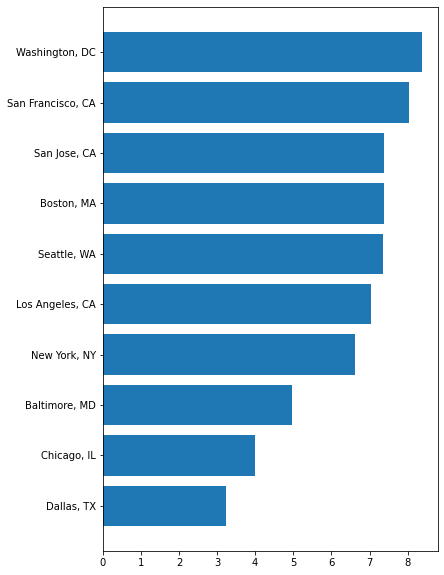

In [72]:
fig, ax = plt.subplots(figsize=(6,10))

cum_sorted = df_cum.sort_values(by=['AverageYearlyReturn(%)'], ascending = True)
plt.barh(y=cum_sorted['City'], width=cum_sorted['AverageYearlyReturn(%)'])

## Model Building

### Time series data decomposition

In [73]:
#Obtained this function from lecture 58 notebook. Used for better
#readabilty.

def display_df(dftest):
    '''
    Display the output from a Dickey-Fuller test in a more readable format
    '''
    
    
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    display(dfoutput)

Let's first start looking at the decomposition of our time series data of homes prices from 1996 - 2018 from Washington, DC.

In [74]:
#Decomposing
decomposition = seasonal_decompose(melted_df['Washington, DC'])

#General trend. (i.e. overtime,how does the house market change.)
trend = decomposition.trend

#Seasonal trend
seasonal = decomposition.seasonal

#This will be the leftover noise in the model.
residual = decomposition.resid

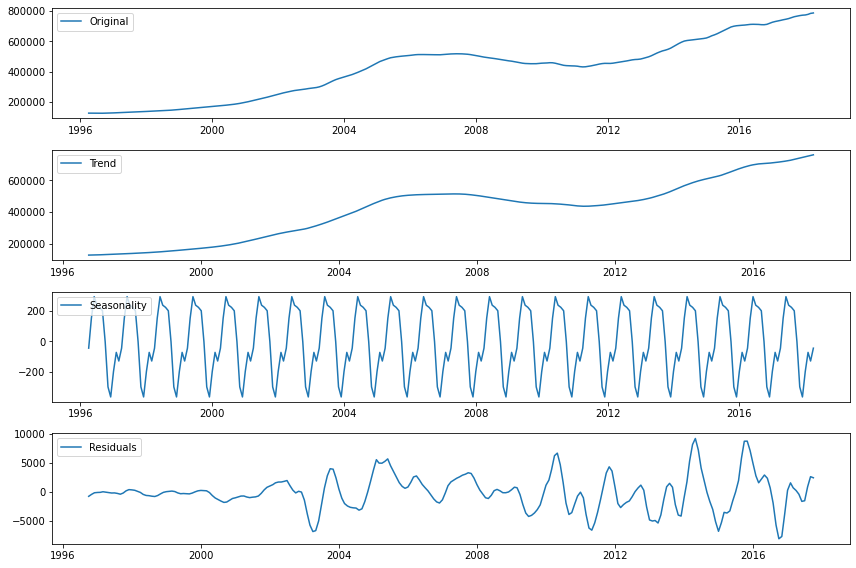

In [75]:
# Plot gathered statistics
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(melted_df['Washington, DC'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

In [76]:
# Drop NaN values from residuals.

house_ts_decompose = residual 
house_ts_decompose.dropna(inplace = True)

In [77]:
#After we take out the trend and the seasonality, we look at our residual
#with no null values.
dftest = adfuller(house_ts_decompose)

#Print out our results. 
display_df(dftest)

Test Statistic                  -4.719574
p-value                          0.000077
#Lags Used                      10.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64

We got a stationary time series but we see that there are some trends in there still. We know that because our residuals is heteroskedastic.

We are going to make a function that takes in all of our selected cities and make a time series model for all of the cities

In [ ]:
#def decompose_ts(city):
  #  decomposition = seasonal_decompose(melted_df[city])
  #  trend = decomposition.trend
  #  seasonal = decomposition.seasonal
   # residual = decomposition.resid
    

### Baseline Model

Function to build baseline model

In [78]:
class baseline_mod:
    
    def __init__(self,city='Washington, DC'):
        self.city = city
    
    def plot_shift(self,df):
        ax = df[self.city].plot(figsize=(15,10))
        df[self.city].shift(1).plot()
        df[self.city].shift(2).plot()
        ax.legend(['Original', 'shift 1', 'shift 2'])
        plt.show()
        
        
    def shift_df(self, df):
        self.shifted_df = pd.DataFrame(np.hstack((df[self.city].values.reshape(-1, 1),
                                                  df[self.city].shift().values.reshape(-1, 1),
                                                  df[self.city].shift(periods=2).values.reshape(-1, 1))),
                                       columns=['orig', 'shifted_one_period', 'shifted_two_periods'],
                                       index=df.index)
        self.rmse_shift1_ = mean_squared_error(self.shifted_df['orig'][1:], self.shifted_df['shifted_one_period'][1:], squared=False)
        self.rmse_shift2_ = mean_squared_error(self.shifted_df['orig'][2:], self.shifted_df['shifted_two_periods'][2:], squared=False)
        return self.shifted_df

        

Look at plot of shifted time series for Washington, DC

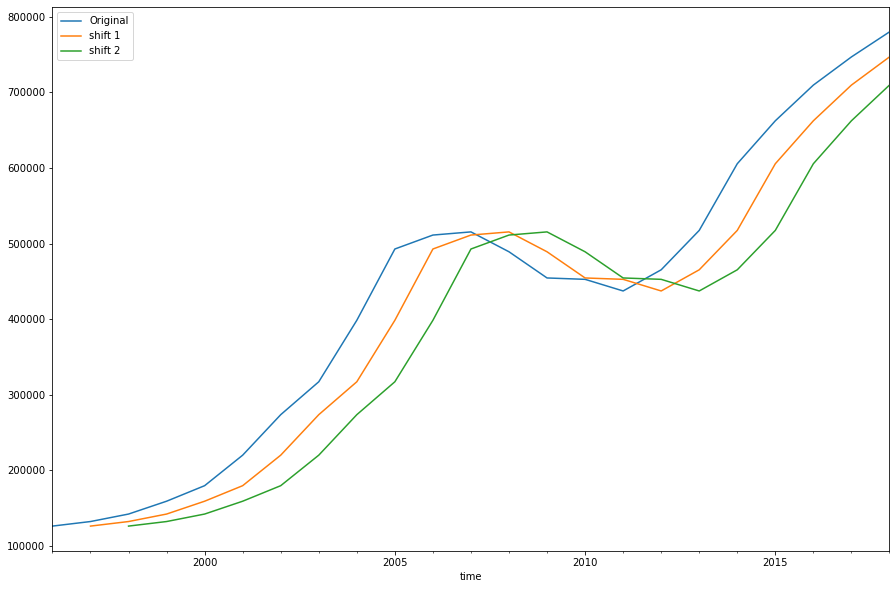

In [79]:
baseline_year = baseline_mod()
baseline_year.plot_shift(resampled_year)

Build dataframe of shifted values in Washington, DC.

In [80]:
baseline_year.shift_df(resampled_year)

orig  shifted_one_period  shifted_two_periods
time                                                         
1996-12-31  126250.0                 NaN                  NaN
1997-12-31  132275.0            126250.0                  NaN
1998-12-31  142175.0            132275.0             126250.0
1999-12-31  159150.0            142175.0             132275.0
2000-12-31  179700.0            159150.0             142175.0
2001-12-31  220050.0            179700.0             159150.0
2002-12-31  273600.0            220050.0             179700.0
2003-12-31  317125.0            273600.0             220050.0
2004-12-31  398425.0            317125.0             273600.0
2005-12-31  492725.0            398425.0             317125.0
2006-12-31  511175.0            492725.0             398425.0
2007-12-31  515350.0            511175.0             492725.0
2008-12-31  489050.0            515350.0             511175.0
2009-12-31  454425.0            489050.0             515350.0
2010-12-31  452600.0            454425.0             489050.0
2011-12-31  437225.0            452600.0             454425.0
2012-12-31  465225.0            437225.0             452600.0
2013-12-31  517325.0            465225.0             437225.0
2014-12-31  605500.0            517325.0             465225.0
2015-12-31  662300.0            605500.0             517325.0
2016-12-31  709500.0            662300.0             605500.0
2017-12-31  746750.0            709500.0             662300.0
2018-12-31  779850.0            746750.0             709500.0

In [81]:
print(baseline_year.rmse_shift1_)
print(baseline_year.rmse_shift2_)

44942.247030848586
87278.32651788132


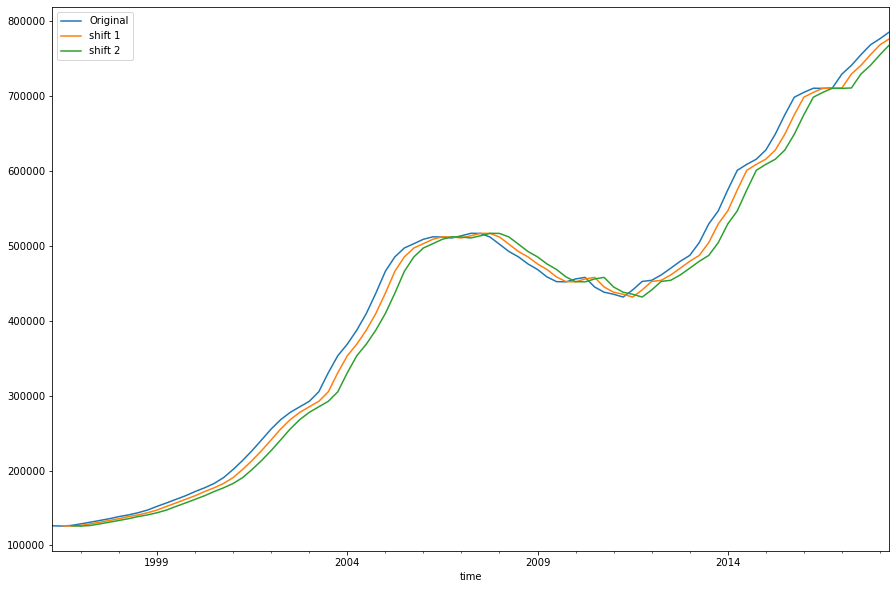

In [82]:
baseline_quarterly = baseline_mod()
baseline_quarterly.plot_shift(resampled_quarter)

In [83]:
baseline_quarterly.shift_df(resampled_quarter)

orig  shifted_one_period  shifted_two_periods
time                                                         
1996-06-30  126250.0                 NaN                  NaN
1996-09-30  125800.0            126250.0                  NaN
1996-12-31  126650.0            125800.0             126250.0
1997-03-31  128800.0            126650.0             125800.0
1997-06-30  131050.0            128800.0             126650.0
1997-09-30  133350.0            131050.0             128800.0
1997-12-31  135700.0            133350.0             131050.0
1998-03-31  138500.0            135700.0             133350.0
1998-06-30  140750.0            138500.0             135700.0
1998-09-30  143650.0            140750.0             138500.0
1998-12-31  147250.0            143650.0             140750.0
1999-03-31  152150.0            147250.0             143650.0
1999-06-30  156750.0            152150.0             147250.0
1999-09-30  161550.0            156750.0             152150.0
1999-12-31  166350.0            161550.0             156750.0
2000-03-31  171950.0            166350.0             161550.0
2000-06-30  176950.0            171950.0             166350.0
2000-09-30  182750.0            176950.0             171950.0
2000-12-31  190600.0            182750.0             176950.0
2001-03-31  201500.0            190600.0             182750.0
2001-06-30  213550.0            201500.0             190600.0
2001-09-30  226750.0            213550.0             201500.0
2001-12-31  241050.0            226750.0             213550.0
2002-03-31  255500.0            241050.0             226750.0
2002-06-30  268000.0            255500.0             241050.0
2002-09-30  277650.0            268000.0             255500.0
2002-12-31  285100.0            277650.0             268000.0
2003-03-31  292400.0            285100.0             277650.0
2003-06-30  305150.0            292400.0             285100.0
2003-09-30  330550.0            305150.0             292400.0
2003-12-31  353300.0            330550.0             305150.0
2004-03-31  368800.0            353300.0             330550.0
2004-06-30  387500.0            368800.0             353300.0
2004-09-30  409700.0            387500.0             368800.0
2004-12-31  436800.0            409700.0             387500.0
2005-03-31  466050.0            436800.0             409700.0
2005-06-30  485350.0            466050.0             436800.0
2005-09-30  497200.0            485350.0             466050.0
2005-12-31  502950.0            497200.0             485350.0
2006-03-31  508850.0            502950.0             497200.0
2006-06-30  512100.0            508850.0             502950.0
2006-09-30  511800.0            512100.0             508850.0
2006-12-31  510600.0            511800.0             512100.0
2007-03-31  513500.0            510600.0             511800.0
2007-06-30  516800.0            513500.0             510600.0
2007-09-30  516650.0            516800.0             513500.0
2007-12-31  511850.0            516650.0             516800.0
2008-03-31  502200.0            511850.0             516650.0
2008-06-30  492450.0            502200.0             511850.0
2008-09-30  485300.0            492450.0             502200.0
2008-12-31  475850.0            485300.0             492450.0
2009-03-31  468450.0            475850.0             485300.0
2009-06-30  458500.0            468450.0             475850.0
2009-09-30  452250.0            458500.0             468450.0
2009-12-31  451950.0            452250.0             458500.0
2010-03-31  455850.0            451950.0             452250.0
2010-06-30  457950.0            455850.0             451950.0
2010-09-30  445100.0            457950.0             455850.0
2010-12-31  438150.0            445100.0             457950.0
2011-03-31  435400.0            438150.0             445100.0
2011-06-30  431650.0            435400.0             438150.0
2011-09-30  441150.0            431650.0             435400.0
2011-12-31  452500.0            441150.0        

In [84]:
print(baseline_quarterly.rmse_shift1_)
print(baseline_quarterly.rmse_shift2_)

12208.992122053467
23845.184940100302


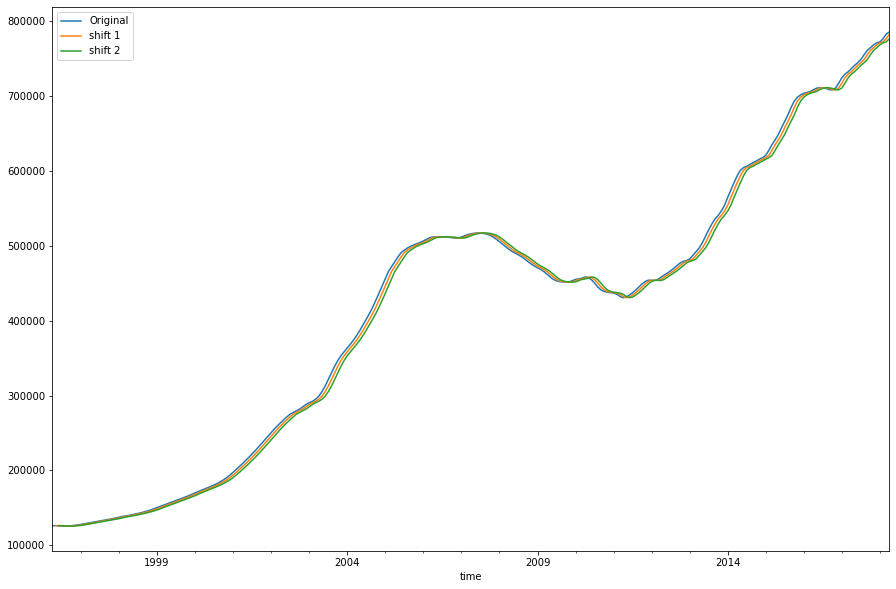

In [85]:
baseline_monthly = baseline_mod()
baseline_monthly.plot_shift(melted_df)

In [86]:
baseline_monthly.shift_df(melted_df)

orig  shifted_one_period  shifted_two_periods
time                                                         
1996-04-01  126500.0                 NaN                  NaN
1996-05-01  126250.0            126500.0                  NaN
1996-06-01  126000.0            126250.0             126500.0
1996-07-01  125800.0            126000.0             126250.0
1996-08-01  125750.0            125800.0             126000.0
1996-09-01  125900.0            125750.0             125800.0
1996-10-01  126250.0            125900.0             125750.0
1996-11-01  126650.0            126250.0             125900.0
1996-12-01  127300.0            126650.0             126250.0
1997-01-01  128050.0            127300.0             126650.0
1997-02-01  128800.0            128050.0             127300.0
1997-03-01  129500.0            128800.0             128050.0
1997-04-01  130200.0            129500.0             128800.0
1997-05-01  131050.0            130200.0             129500.0
1997-06-01  131900.0            131050.0             130200.0
1997-07-01  132650.0            131900.0             131050.0
1997-08-01  133350.0            132650.0             131900.0
1997-09-01  134000.0            133350.0             132650.0
1997-10-01  134800.0            134000.0             133350.0
1997-11-01  135700.0            134800.0             134000.0
1997-12-01  136650.0            135700.0             134800.0
1998-01-01  137600.0            136650.0             135700.0
1998-02-01  138500.0            137600.0             136650.0
1998-03-01  139150.0            138500.0             137600.0
1998-04-01  139950.0            139150.0             138500.0
1998-05-01  140750.0            139950.0             139150.0
1998-06-01  141700.0            140750.0             139950.0
1998-07-01  142650.0            141700.0             140750.0
1998-08-01  143650.0            142650.0             141700.0
1998-09-01  144750.0            143650.0             142650.0
1998-10-01  145950.0            144750.0             143650.0
1998-11-01  147250.0            145950.0             144750.0
1998-12-01  148800.0            147250.0             145950.0
1999-01-01  150500.0            148800.0             147250.0
1999-02-01  152150.0            150500.0             148800.0
1999-03-01  153650.0            152150.0             150500.0
1999-04-01  155200.0            153650.0             152150.0
1999-05-01  156750.0            155200.0             153650.0
1999-06-01  158350.0            156750.0             155200.0
1999-07-01  159950.0            158350.0             156750.0
1999-08-01  161550.0            159950.0             158350.0
1999-09-01  163150.0            161550.0             159950.0
1999-10-01  164750.0            163150.0             161550.0
1999-11-01  166350.0            164750.0             163150.0
1999-12-01  168150.0            166350.0             164750.0
2000-01-01  170100.0            168150.0             166350.0
2000-02-01  171950.0            170100.0             168150.0
2000-03-01  173650.0            171950.0             170100.0
2000-04-01  175300.0            173650.0             171950.0
2000-05-01  176950.0            175300.0             173650.0
2000-06-01  178750.0            176950.0             175300.0
2000-07-01  180650.0            178750.0             176950.0
2000-08-01  182750.0            180650.0             178750.0
2000-09-01  185050.0            182750.0             180650.0
2000-10-01  187650.0            185050.0             182750.0
2000-11-01  190600.0            187650.0             185050.0
2000-12-01  194000.0            190600.0             187650.0
2001-01-01  197650.0            194000.0             190600.0
2001-02-01  201500.0            197650.0             194000.0
2001-03-01  205350.0            201500.0             197650.0
2001-04-01  209400.0            205350.0             201500.0
2001-05-01  213550.0            209400.0             205350.0
2001-06-01  217850.0            213550.0        

In [87]:
print(baseline_monthly.rmse_shift1_)
print(baseline_monthly.rmse_shift2_)

4139.46156467898
8226.567713804458


### ARIMA model

In [88]:
def add_freq(idx, freq=None):
    """Add a frequency attribute to idx, through inference or directly.

    Returns a copy.  If `freq` is None, it is inferred.
    """

    idx = idx.copy()
    if freq is None:
        if idx.freq is None:
            freq = pd.infer_freq(idx)
        else:
            return idx
    idx.freq = pd.tseries.frequencies.to_offset(freq)
    if idx.freq is None:
        raise AttributeError('no discernible frequency found to `idx`.  Specify'
                             ' a frequency string with `freq`.')
    return idx

In [89]:
#We are adding frequency attribute to our dataframe index. 
melted_df.index = add_freq(melted_df.index)
#Check the length of our dataframe. 
melted_df.shape

(265, 10)

In [90]:
melted_df

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-04-01        126500.0      175950.0           306900.0     170600.0   
1996-05-01        126250.0      175650.0           307600.0     171000.0   
1996-06-01        126000.0      175800.0           308400.0     171600.0   
1996-07-01        125800.0      175150.0           309300.0     172200.0   
1996-08-01        125750.0      174400.0           310500.0     173000.0   
1996-09-01        125900.0      174000.0           312000.0     173800.0   
1996-10-01        126250.0      174050.0           313700.0     174800.0   
1996-11-01        126650.0      173850.0           315600.0     176000.0   
1996-12-01        127300.0      174000.0           318100.0     177400.0   
1997-01-01        128050.0      174150.0           321000.0     179000.0   
1997-02-01        128800.0      174200.0           323900.0     180600.0   
1997-03-01        129500.0      174500.0           326600.0     182000.0   
1997-04-01        130200.0      174950.0           329600.0     183600.0   
1997-05-01        131050.0      175550.0           332600.0     185100.0   
1997-06-01        131900.0      176400.0           335800.0     186700.0   
1997-07-01        132650.0      177100.0           339200.0     188300.0   
1997-08-01        133350.0      177900.0           342700.0     190000.0   
1997-09-01        134000.0      178800.0           346400.0     192800.0   
1997-10-01        134800.0      179800.0           350400.0     196000.0   
1997-11-01        135700.0      181000.0           354500.0     199400.0   
1997-12-01        136650.0      181850.0           359100.0     203100.0   
1998-01-01        137600.0      182850.0           364200.0     206900.0   
1998-02-01        138500.0      183700.0           369300.0     210600.0   
1998-03-01        139150.0      184350.0           374100.0     214100.0   
1998-04-01        139950.0      185050.0           379100.0     217600.0   
1998-05-01        140750.0      185650.0           384000.0     221000.0   
1998-06-01        141700.0      186350.0           388900.0     224300.0   
1998-07-01        142650.0      187100.0           393700.0     227500.0   
1998-08-01        143650.0      187950.0           398300.0     230700.0   
1998-09-01        144750.0      189400.0           402600.0     233800.0   
1998-10-01        145950.0      190500.0           406800.0     236900.0   
1998-11-01        147250.0      191950.0           410900.0     240000.0   
1998-12-01        148800.0      193650.0           415400.0     243100.0   
1999-01-01        150500.0      195350.0           420200.0     246300.0   
1999-02-01        152150.0      196950.0           425100.0     249200.0   
1999-03-01        153650.0      198450.0           430000.0     251900.0   
1999-04-01        155200.0      200000.0           435400.0     254500.0   
1999-05-01        156750.0      202000.0           441300.0     257100.0   
1999-06-01        158350.0      204250.0           447900.0     259700.0   
1999-07-01        159950.0      206500.0           455500.0     262300.0   
1999-08-01        161550.0      208850.0           463900.0     265000.0   
1999-09-01        163150.0      211200.0           473100.0     267300.0   
1999-10-01        164750.0      213650.0           483300.0     269600.0   
1999-11-01        166350.0      216150.0           494300.0     272200.0   
1999-12-01        168150.0      218900.0           506200.0     274900.0   
2000-01-01        170100.0      221800.0           518700.0     277700.0   
2000-02-01        171950.0      224700.0           530800.0     280500.0   
2000-03-01        173650.0      227550.0           542100.0     283100.0   
2000-04-01        175300.0      229750.0           552700.0     285600.0   
2000-05-01        176950.0      232650.0           562300.0     288000.0   
2000-06-01        178750.0      235600.0           570800.0 

We'll be splitting our data into our train-test split. 
We are making the first 80% of our data into the training set and the last 20% of our dataset into our test set.

In [91]:
train = melted_df.iloc[:212]
test = melted_df.iloc[212:]

In [92]:
# #Here, we are splitting the training set into cross-validations score. 
# split = TimeSeriesSplit()
# for train_ind, val_ind in split.split(train):
    
# #     print(f'Train index: {train_ind}')
# #     print(f'Test  index: {val_ind}')

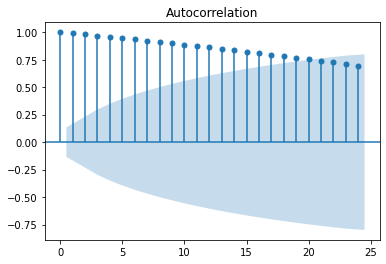

In [93]:
#Plotting the acf for Washington DC just for visualization. 
plot_acf(train['Washington, DC'].dropna());

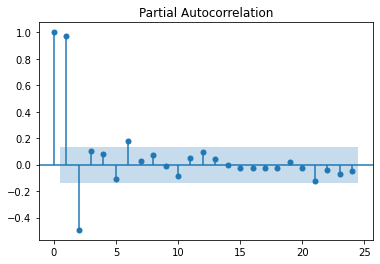

In [94]:
#Plotted our PACF for Washington DC.
#Diff is plotting the particial autocorrelation of the graph.
plot_pacf(train['Washington, DC'].diff().dropna());

In [95]:
class arima_mod: 
    
    def __init__(self, city = 'Washington, DC'):
        self.city = city 

        
    def model(self, df_train, df_test,p,d,q):
        #Fitting our model using ARIMA and instantiating it
        self.model_fit = ARIMA(df_train[self.city], order = [p,d,q]).fit()
        #Creating our prediction 
        self.y_hat_test_ = self.model_fit.predict(start=df_test[self.city].index[0], 
                                                  end=df_test[self.city].index[-1],typ='levels')
        self.model_summary_ = self.model_fit.summary()
        self.rmse_ = mean_squared_error(df_test[self.city],
                                        self.y_hat_test_,
                                        squared=False)
        print(self.model_summary_)
        print('-'*23)
        print('-'*23)
        print(f'RMSE: {self.rmse_}')
    
    def plot(self, df_test):
        fig, ax = plt.subplots(figsize = (12,8)) 
        ax.plot(df_test[self.city])
        ax.plot(self.y_hat_test_)
        ax.legend(['Original', 'Predicted'])
        ax.set_title(f'Original vs Predicted home values for {self.city}')

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1974.931
Date:                Wed, 11 May 2022   AIC                           3961.862
Time:                        18:35:21   BIC                           3981.973
Sample:                    04-01-1996   HQIC                          3969.992
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0728      0.011    182.992      0.000       2.051       2.095
ar.L2         -1.1598      0.020    -57.841      0.000      -1.199      -1.121
ar.L3          0.0836      0.009      8.930      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2065.492
Date:                Wed, 11 May 2022   AIC                           4142.985
Time:                        18:35:22   BIC                           4163.096
Sample:                    04-01-1996   HQIC                          4151.114
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8584      0.686      2.710      0.007       0.514       3.203
ar.L2         -0.8866      0.696     -1.275      0.202      -2.250       0.477
ar.L3          0.0247      0.028      0.891      0.3

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:      San Francisco, CA   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2506.119
Date:                Wed, 11 May 2022   AIC                           5024.238
Time:                        18:35:22   BIC                           5044.349
Sample:                    04-01-1996   HQIC                          5032.368
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9165      0.014    132.590      0.000       1.888       1.945
ar.L2         -0.9451      0.017    -56.866      0.000      -0.978      -0.913
ar.L3          0.0283      0.003     10.651      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2082.200
Date:                Wed, 11 May 2022   AIC                           4176.400
Time:                        18:35:23   BIC                           4196.511
Sample:                    04-01-1996   HQIC                          4184.529
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0419      0.113     17.991      0.000       1.819       2.264
ar.L2         -1.0933      0.119     -9.226      0.000      -1.326      -0.861
ar.L3          0.0513      0.013      4.020      0.0

                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2036.087
Date:                Wed, 11 May 2022   AIC                           4084.174
Time:                        18:35:25   BIC                           4104.286
Sample:                    04-01-1996   HQIC                          4092.304
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0221      0.050     40.781      0.000       1.925       2.119
ar.L2         -1.1277      0.058    -19.594      0.000      -1.241      -1.015
ar.L3          0.1045      0.010     10.783      0.0

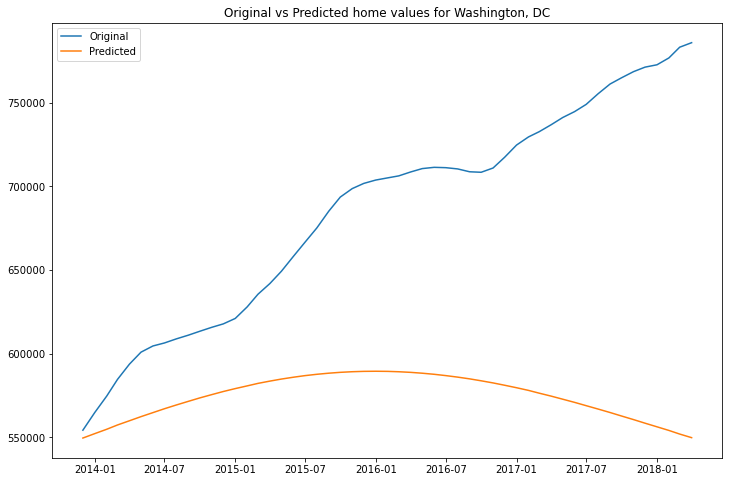

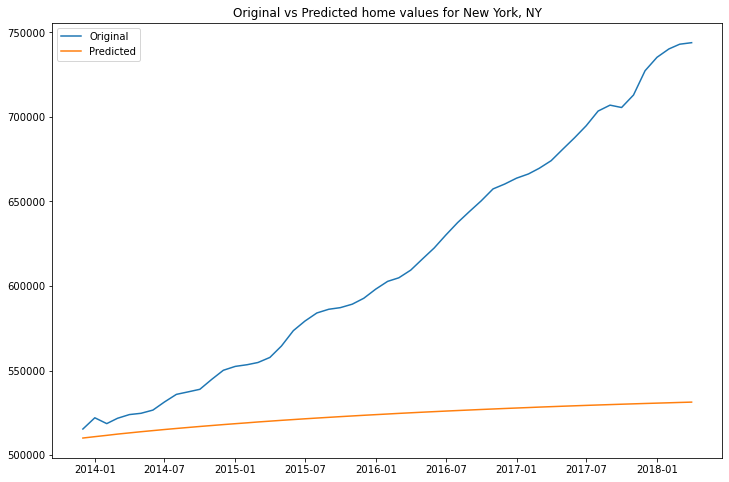

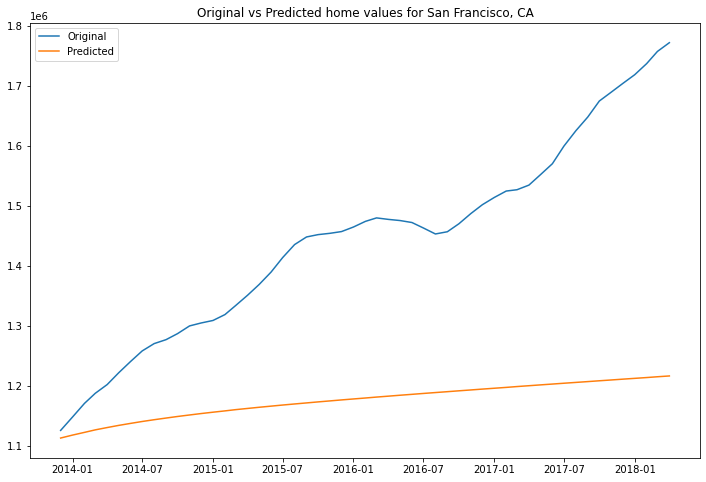

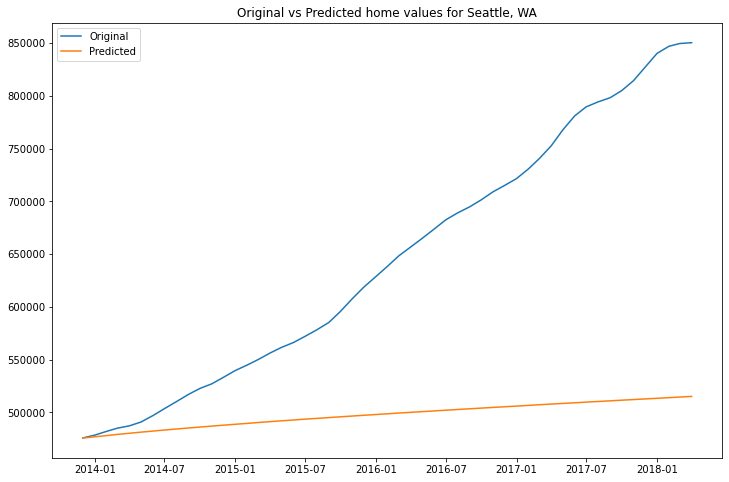

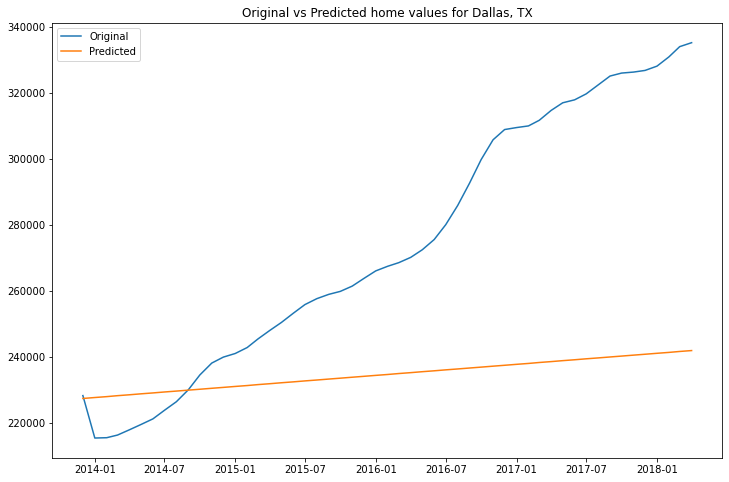

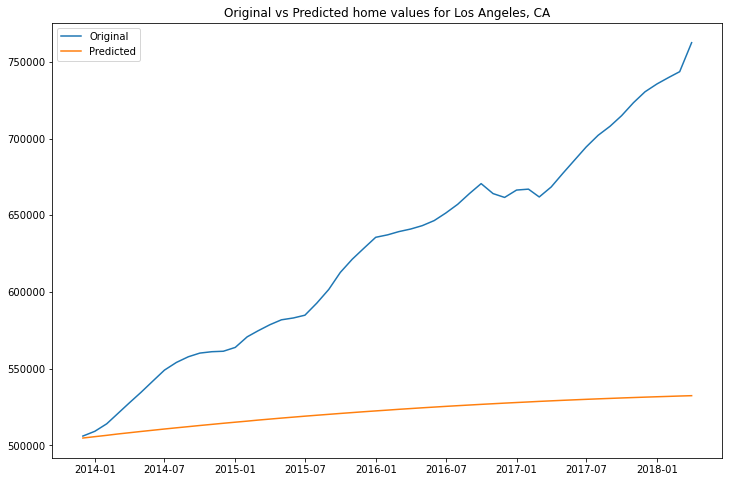

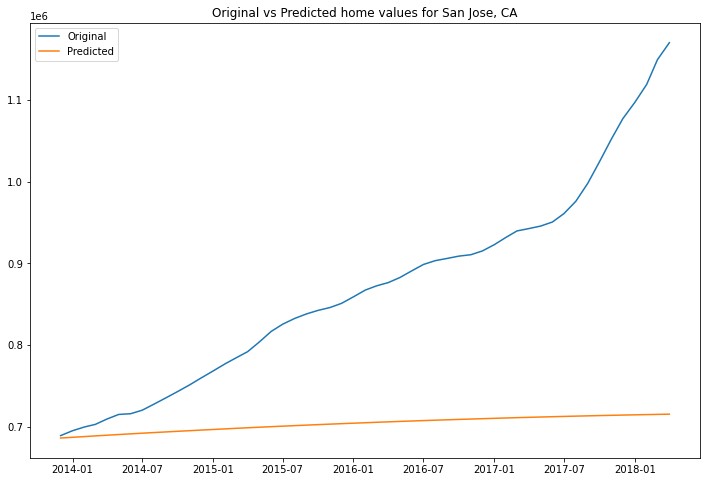

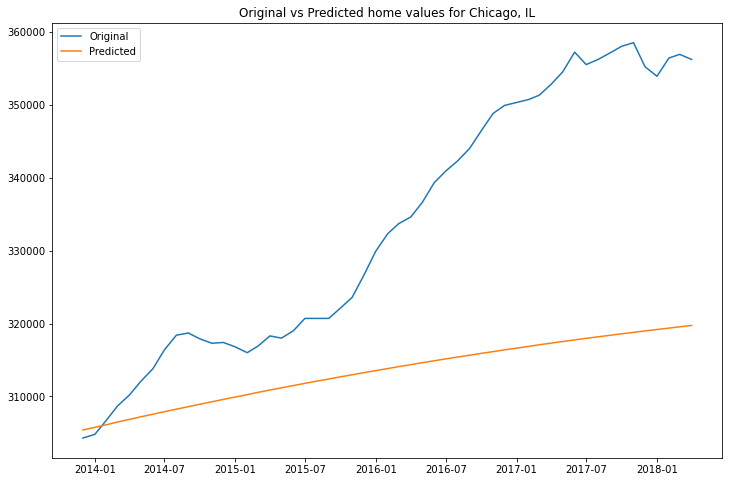

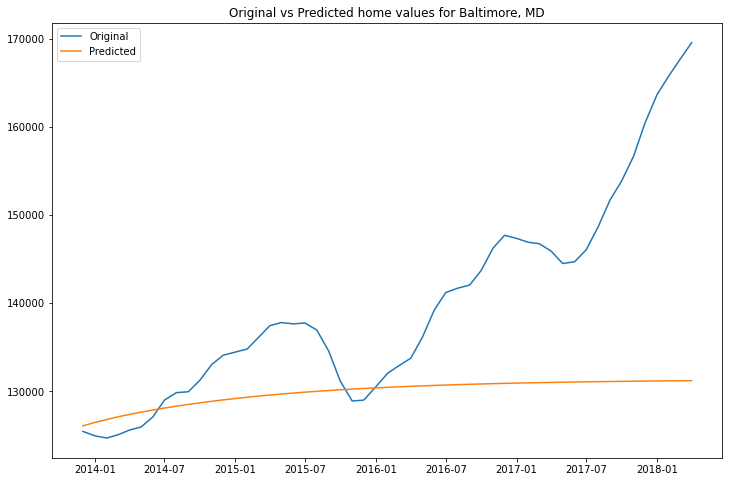

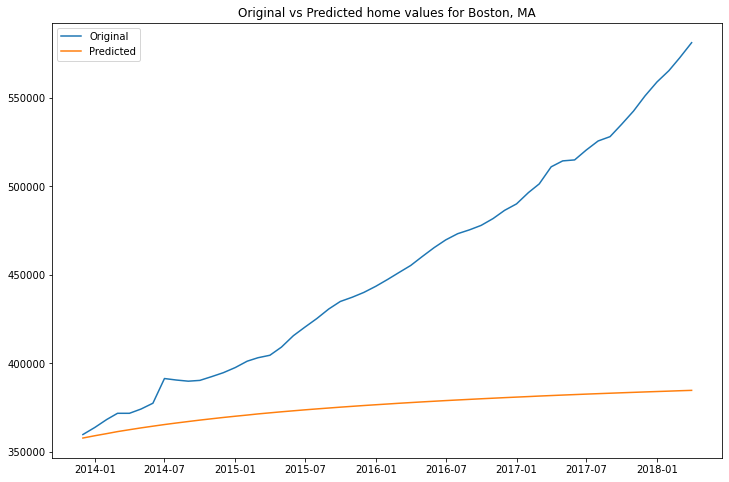

In [96]:
#Not using this model.
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,1,2)
    city_model.plot(test)

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1692.792
Date:                Wed, 11 May 2022   AIC                           3395.584
Time:                        18:35:30   BIC                           3412.319
Sample:                    04-01-1996   HQIC                          3402.349
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2403      0.647      1.917      0.055      -0.028       2.508
ar.L2         -0.2568      0.635     -0.404      0.686      -1.502       0.988
ma.L1         -1.1961      0.638     -1.874      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1965.208
Date:                Wed, 11 May 2022   AIC                           3940.415
Time:                        18:35:30   BIC                           3957.151
Sample:                    04-01-1996   HQIC                          3947.181
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9345      1.293      0.723      0.470      -1.599       3.468
ar.L2         -0.0827      1.095     -0.076      0.940      -2.228       2.063
ma.L1         -1.0717      1.304     -0.822      0.4

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1924.040
Date:                Wed, 11 May 2022   AIC                           3858.080
Time:                        18:35:31   BIC                           3874.815
Sample:                    04-01-1996   HQIC                          3864.845
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0782      6.746      0.012      0.991     -13.145      13.301
ar.L2          0.6506      5.629      0.116      0.908     -10.383      11.684
ma.L1         -0.1393      6.745     -0.021      0.9

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1750.564
Date:                Wed, 11 May 2022   AIC                           3511.128
Time:                        18:35:32   BIC                           3527.864
Sample:                    04-01-1996   HQIC                          3517.894
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6202      0.027     60.509      0.000       1.568       1.673
ar.L2         -0.9869      0.027    -36.581      0.000      -1.040      -0.934
ma.L1         -1.6094      0.044    -36.905      0.0

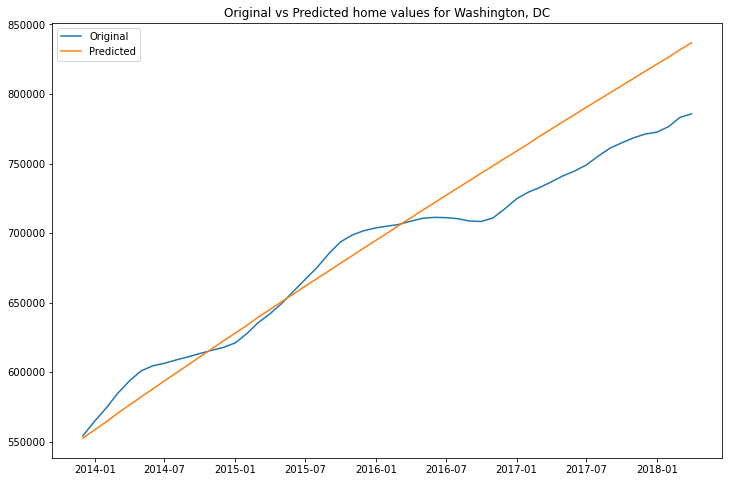

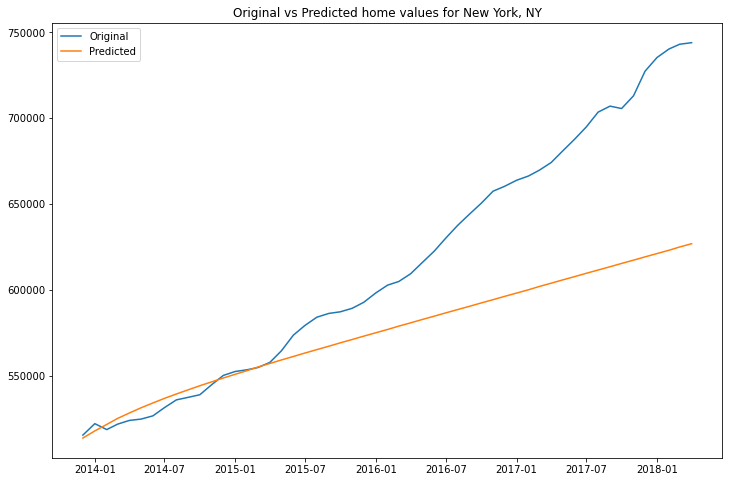

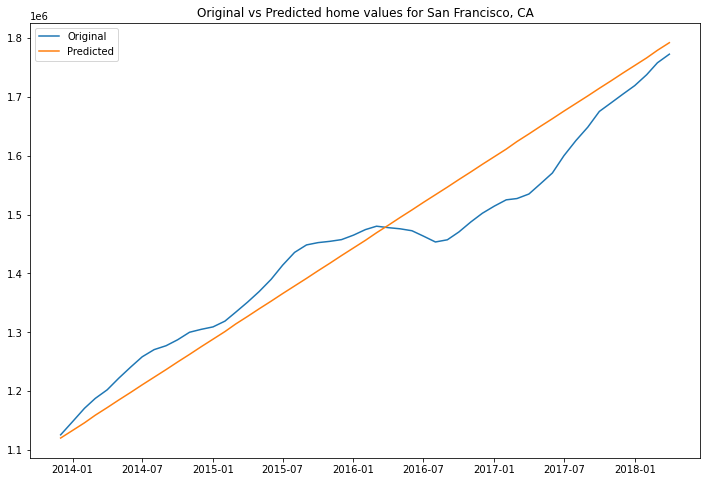

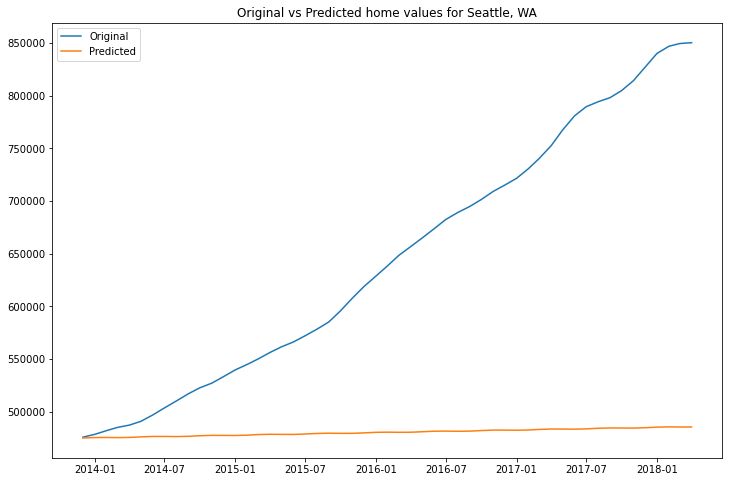

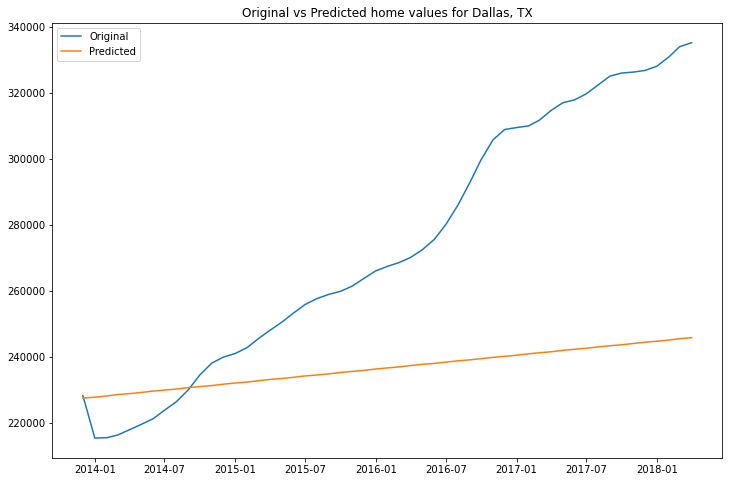

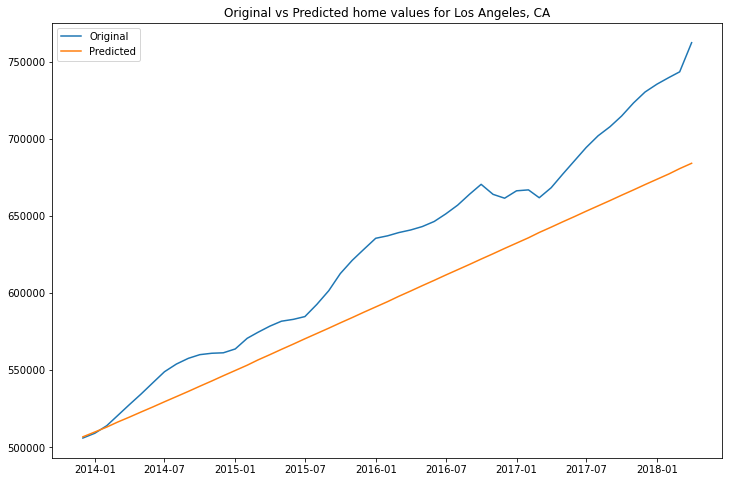

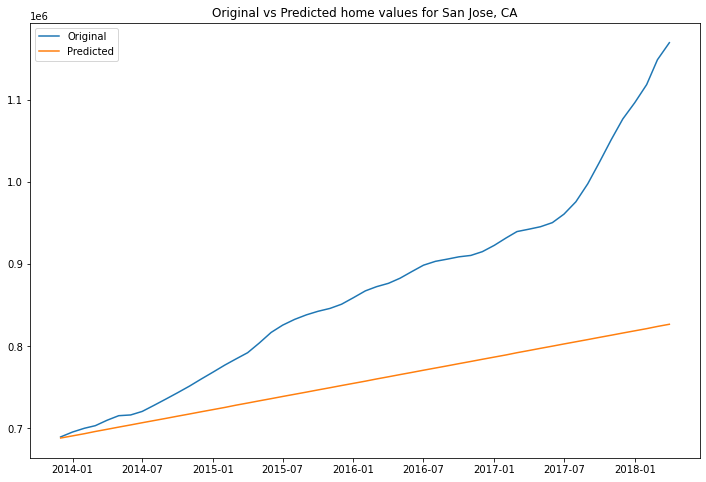

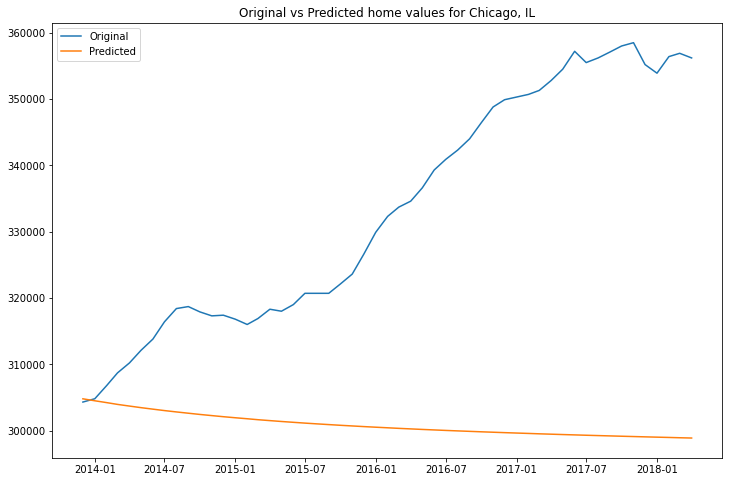

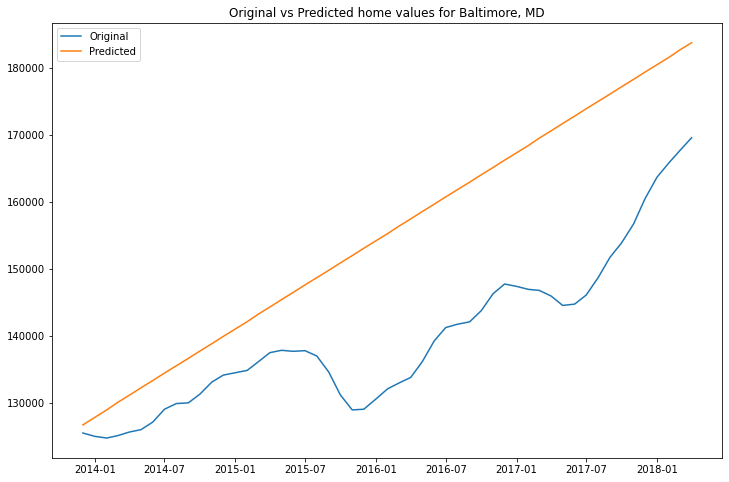

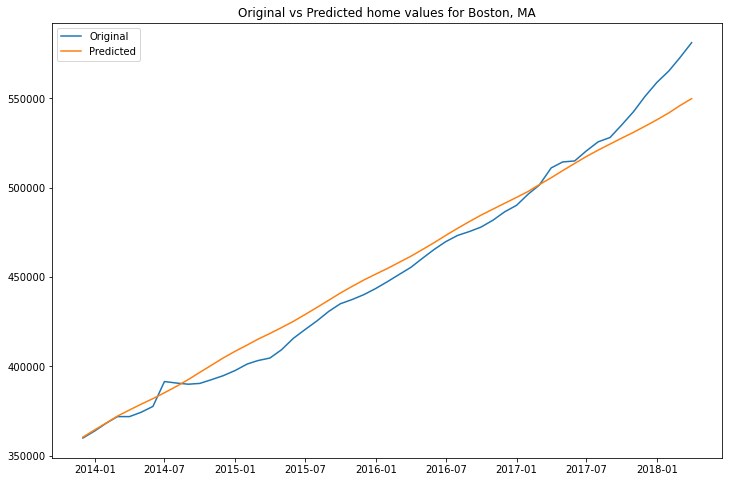

In [97]:
#4 graphs are good.
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 2, 2, 2)
    city_model.plot(test)

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1694.880
Date:                Wed, 11 May 2022   AIC                           3401.759
Time:                        18:35:37   BIC                           3421.842
Sample:                    04-01-1996   HQIC                          3409.878
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9786      0.218      9.063      0.000       1.551       2.406
ar.L2         -1.0526      0.220     -4.789      0.000      -1.483      -0.622
ar.L3          0.0680      0.027      2.548      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1965.100
Date:                Wed, 11 May 2022   AIC                           3942.199
Time:                        18:35:37   BIC                           3962.282
Sample:                    04-01-1996   HQIC                          3950.318
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1676      1.365      0.123      0.902      -2.508       2.843
ar.L2          0.5794      1.173      0.494      0.621      -1.720       2.878
ar.L3         -0.0196      0.039     -0.504      0.6

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:      San Francisco, CA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1976.914
Date:                Wed, 11 May 2022   AIC                           3965.829
Time:                        18:35:38   BIC                           3985.911
Sample:                    04-01-1996   HQIC                          3973.947
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2666      3.835      0.070      0.945      -7.249       7.783
ar.L2          0.6588      3.688      0.179      0.858      -6.571       7.888
ar.L3         -0.0143      0.051     -0.278      0.7

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.




-----------------------
-----------------------
RMSE: 31680.591585534952


C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           San Jose, CA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1874.545
Date:                Wed, 11 May 2022   AIC                           3761.090
Time:                        18:35:39   BIC                           3781.172
Sample:                    04-01-1996   HQIC                          3769.208
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3571      4.857      0.074      0.941      -9.163       9.877
ar.L2          0.5703      4.662      0.122      0.903      -8.567       9.707
ar.L3      -7.381e-05      0.046     -0.002      0.9

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1723.659
Date:                Wed, 11 May 2022   AIC                           3459.317
Time:                        18:35:40   BIC                           3479.400
Sample:                    04-01-1996   HQIC                          3467.436
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1552      1.347      0.115      0.908      -2.485       2.795
ar.L2          0.7558      1.334      0.566      0.571      -1.859       3.371
ar.L3         -0.0249      0.026     -0.961      0.3

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1611.135
Date:                Wed, 11 May 2022   AIC                           3234.270
Time:                        18:35:40   BIC                           3254.352
Sample:                    04-01-1996   HQIC                          3242.389
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3770      1.080      0.349      0.727      -1.739       2.493
ar.L2          0.0819      0.472      0.174      0.862      -0.843       1.007
ar.L3          0.0130      0.176      0.074      0.9

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1753.168
Date:                Wed, 11 May 2022   AIC                           3518.336
Time:                        18:35:40   BIC                           3538.419
Sample:                    04-01-1996   HQIC                          3526.455
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4059      0.614      2.289      0.022       0.202       2.610
ar.L2         -0.6220      0.533     -1.167      0.243      -1.667       0.423
ar.L3          0.0002      0.058      0.003      0.9

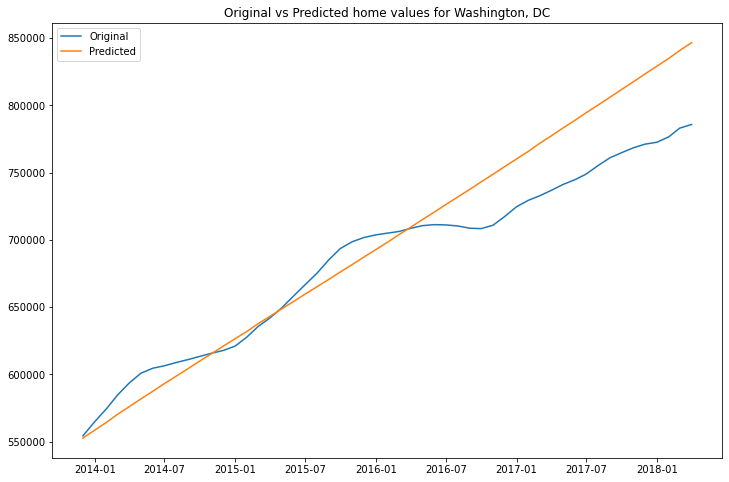

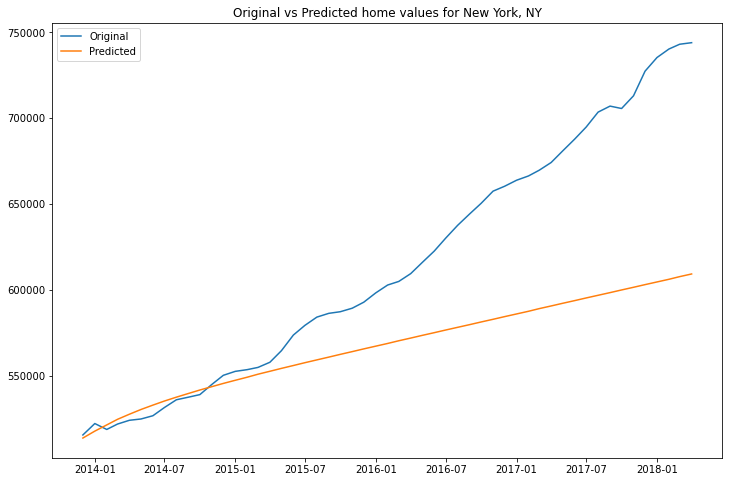

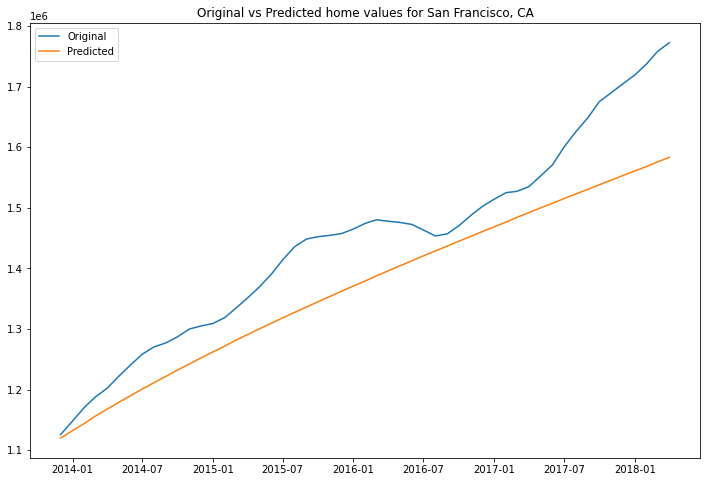

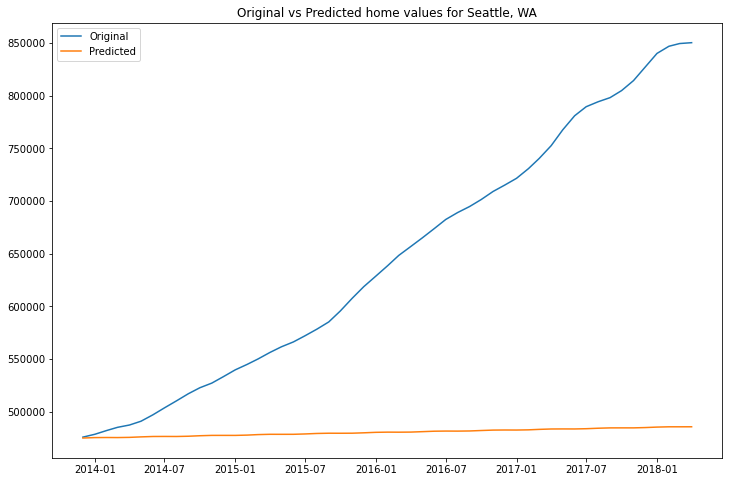

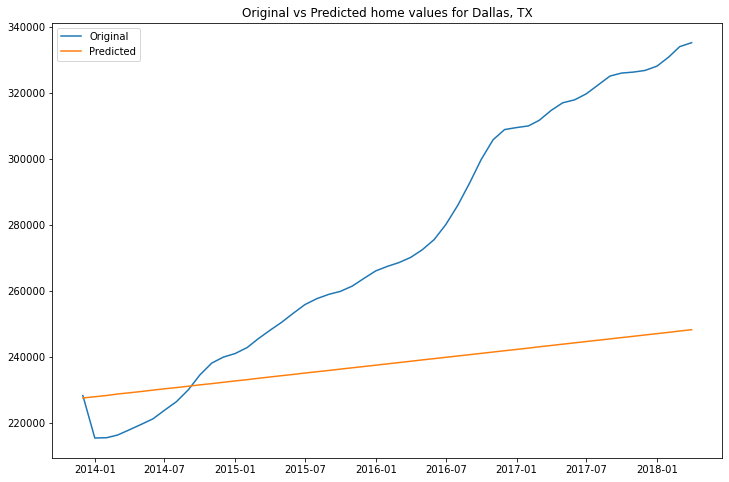

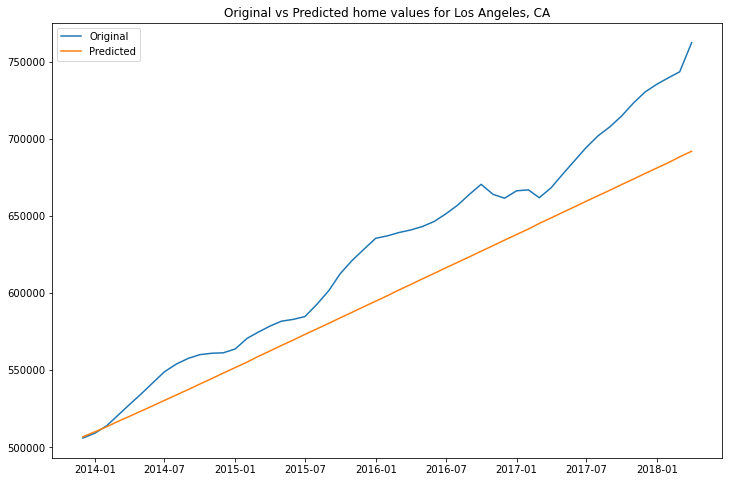

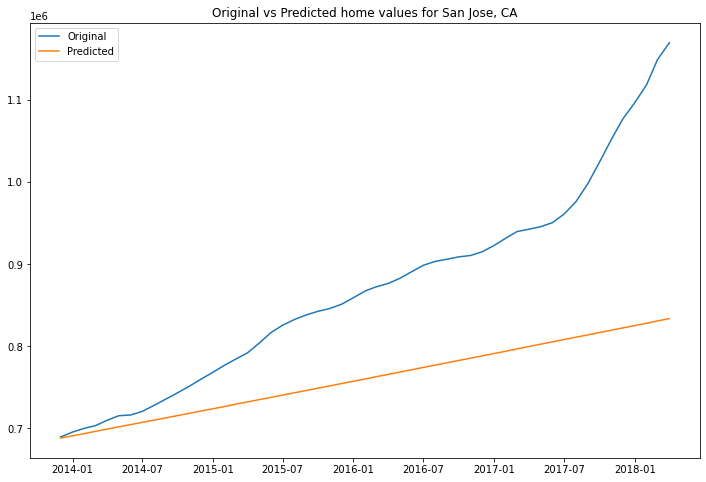

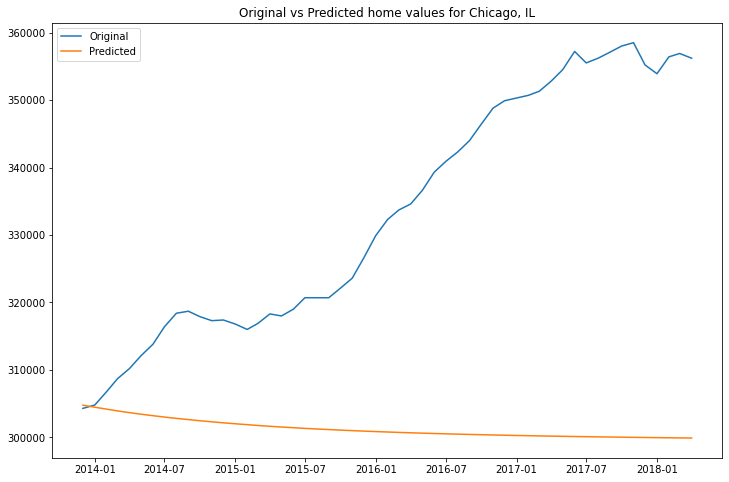

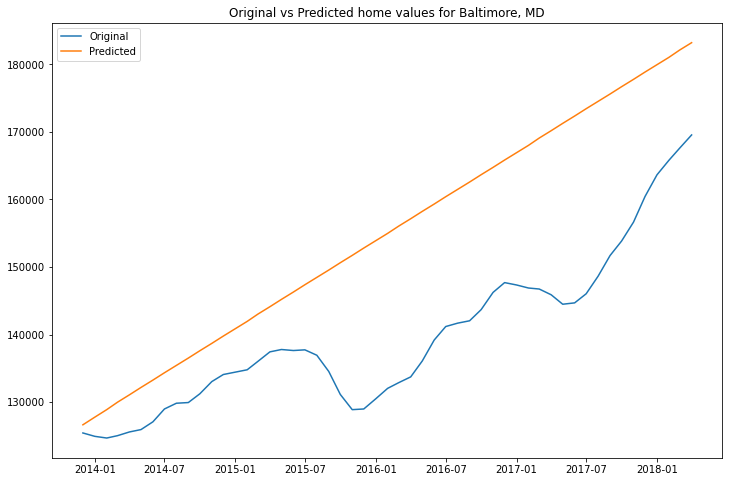

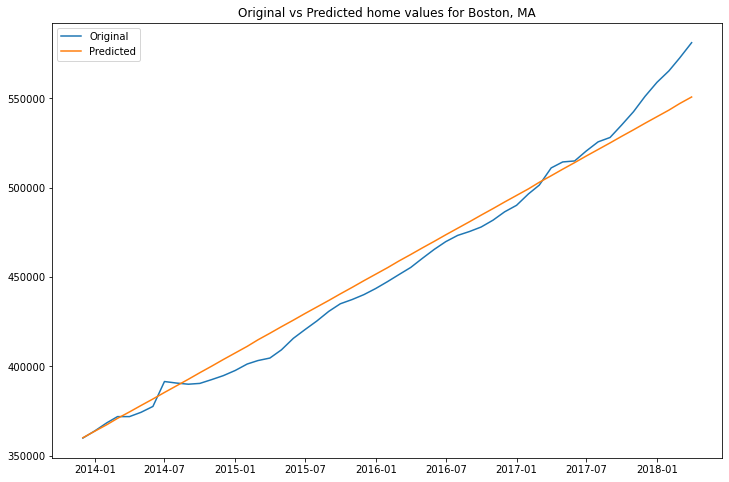

In [98]:
#4 but with an edge. Best Model
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,2,2)
    city_model.plot(test)

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1672.494
Date:                Wed, 11 May 2022   AIC                           3356.988
Time:                        18:35:45   BIC                           3377.042
Sample:                    04-01-1996   HQIC                          3365.096
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4894      0.483      1.013      0.311      -0.457       1.436
ar.L2          0.1713      0.379      0.452      0.651      -0.571       0.913
ar.L3         -0.0525      0.031     -1.709      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1962.051
Date:                Wed, 11 May 2022   AIC                           3936.102
Time:                        18:35:45   BIC                           3956.156
Sample:                    04-01-1996   HQIC                          3944.210
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7507      0.152      4.954      0.000       0.454       1.048
ar.L2         -0.0042      0.068     -0.062      0.951      -0.137       0.129
ar.L3         -0.0247      0.032     -0.778      0.4

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Seattle, WA   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1736.362
Date:                Wed, 11 May 2022   AIC                           3484.724
Time:                        18:35:46   BIC                           3504.778
Sample:                    04-01-1996   HQIC                          3492.832
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2969     31.576     -0.009      0.992     -62.185      61.591
ar.L2          0.6662     22.116      0.030      0.976     -42.681      44.013
ar.L3         -0.0369      1.173     -0.031      0.9

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1540.606
Date:                Wed, 11 May 2022   AIC                           3093.212
Time:                        18:35:47   BIC                           3113.266
Sample:                    04-01-1996   HQIC                          3101.320
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7866      0.066    -11.839      0.000      -0.917      -0.656
ar.L2         -0.9974      0.050    -19.891      0.000      -1.096      -0.899
ar.L3         -0.0420      0.027     -1.529      0.1

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1741.639
Date:                Wed, 11 May 2022   AIC                           3495.278
Time:                        18:35:48   BIC                           3515.332
Sample:                    04-01-1996   HQIC                          3503.386
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1531      0.464      0.330      0.742      -0.757       1.063
ar.L2          0.2931      0.311      0.943      0.345      -0.316       0.902
ar.L3         -0.0411      0.025     -1.650      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1754.048
Date:                Wed, 11 May 2022   AIC                           3520.096
Time:                        18:35:49   BIC                           3540.150
Sample:                    04-01-1996   HQIC                          3528.204
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3382      0.203      6.577      0.000       0.939       1.737
ar.L2         -0.4960      0.135     -3.681      0.000      -0.760      -0.232
ar.L3         -0.0188      0.071     -0.265      0.7

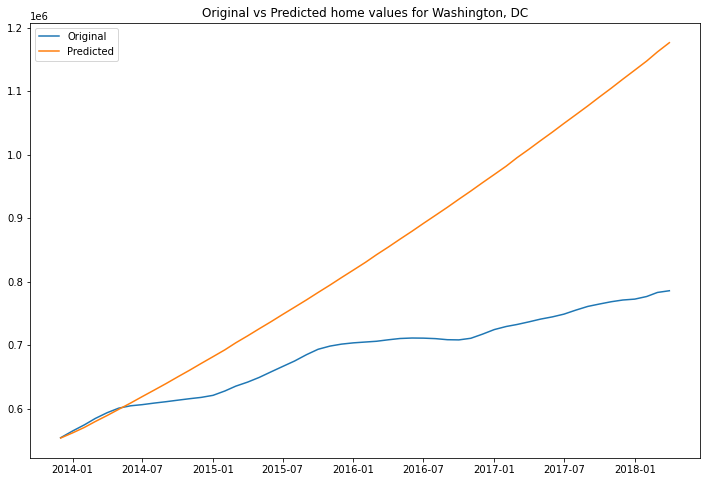

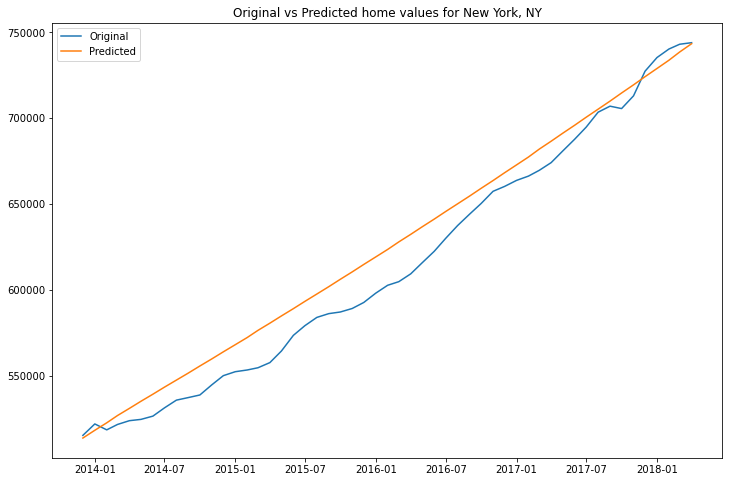

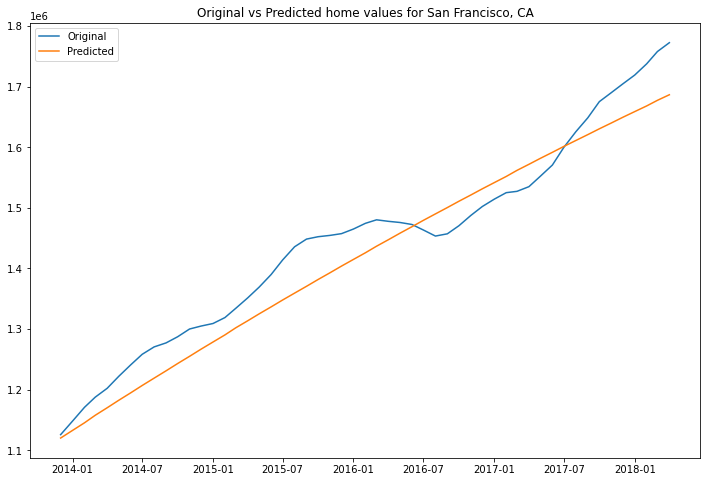

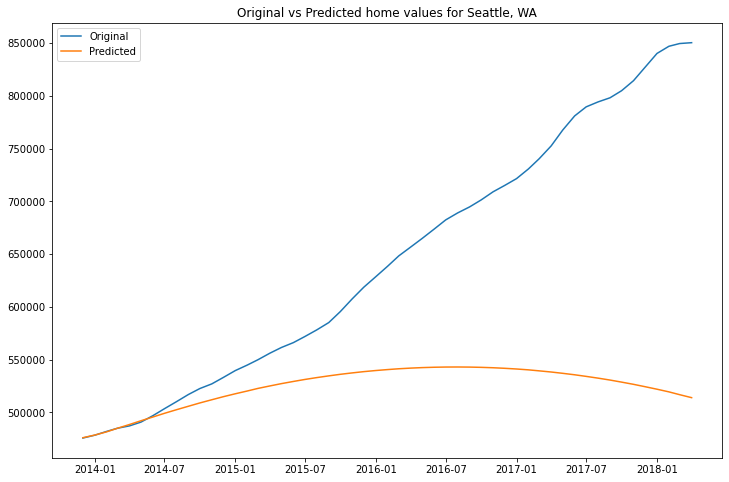

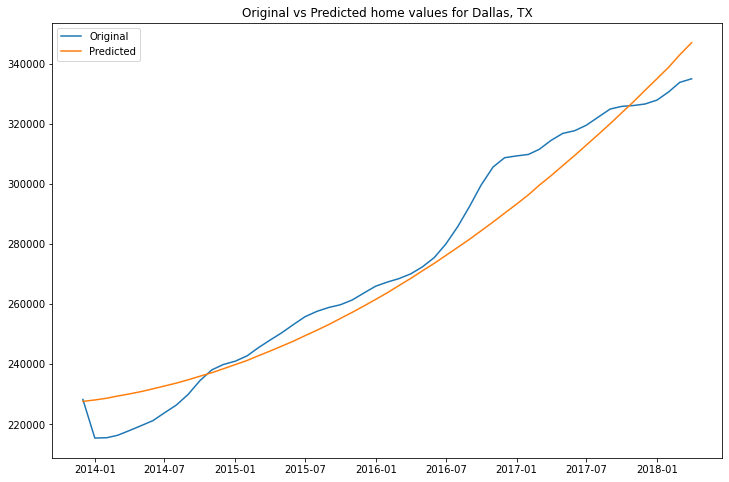

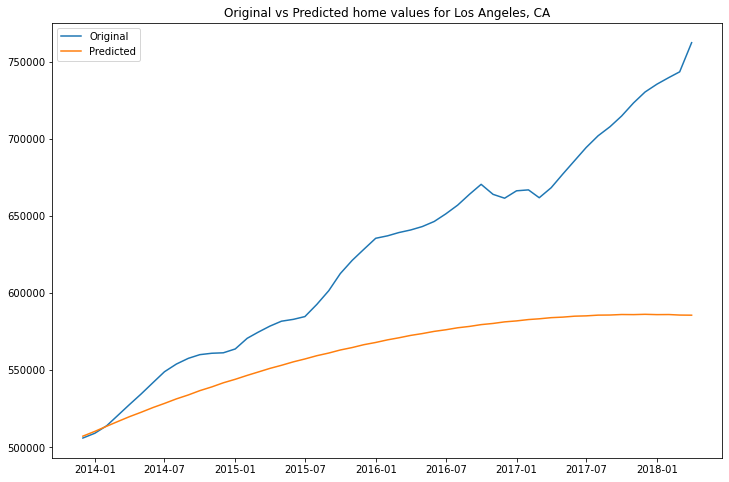

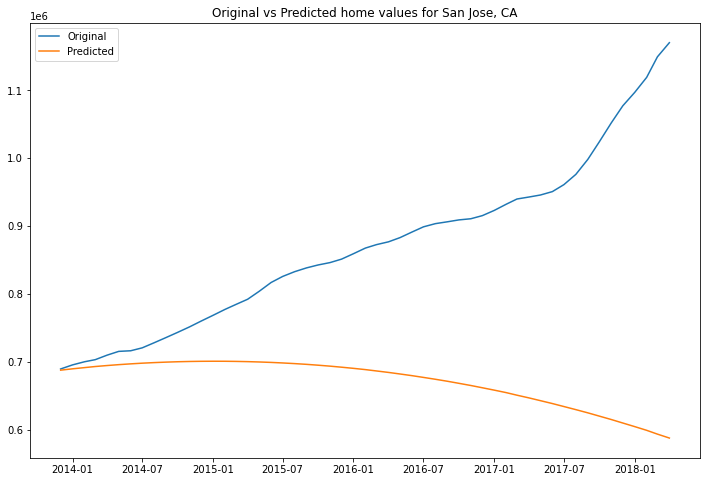

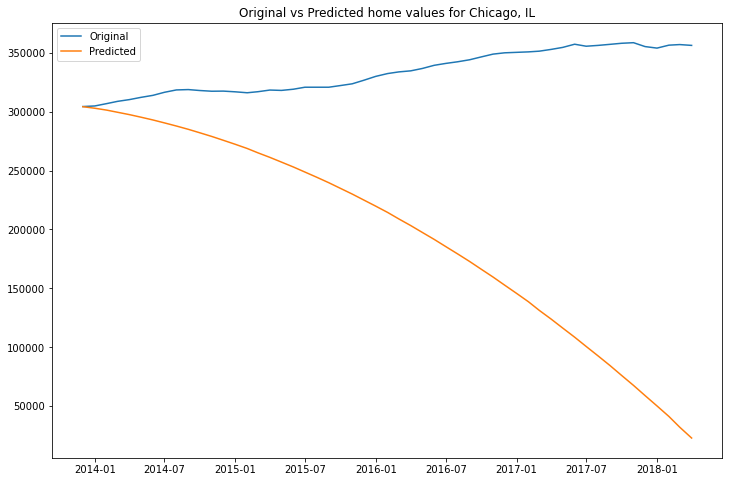

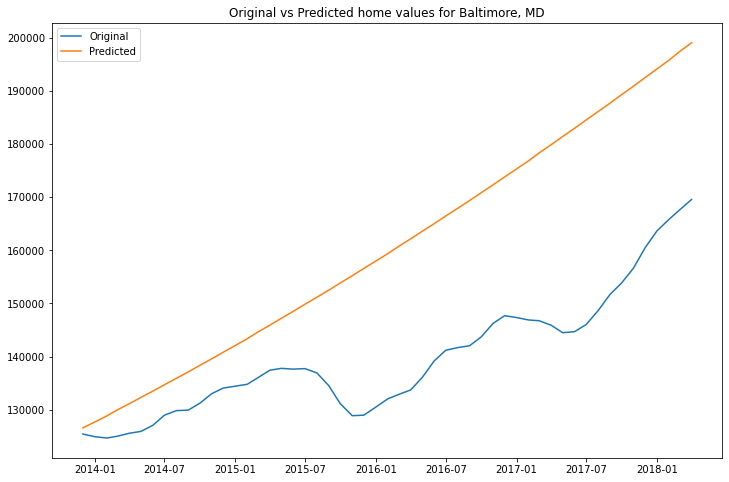

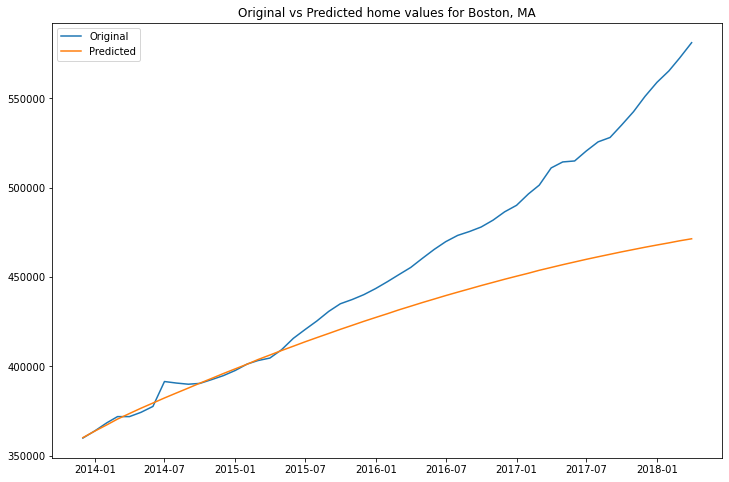

In [99]:
#3 useful graphs 
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,3,2)
    city_model.plot(test)

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1670.812
Date:                Wed, 11 May 2022   AIC                           3351.623
Time:                        18:35:54   BIC                           3368.335
Sample:                    04-01-1996   HQIC                          3358.380
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5064      0.184      8.186      0.000       1.146       1.867
ar.L2         -0.6284      0.133     -4.722      0.000      -0.889      -0.368
ma.L1         -1.7312      0.191     -9.054      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1966.903
Date:                Wed, 11 May 2022   AIC                           3943.805
Time:                        18:35:54   BIC                           3960.517
Sample:                    04-01-1996   HQIC                          3950.562
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0638      0.065    -16.491      0.000      -1.190      -0.937
ar.L2         -0.0707      0.045     -1.562      0.118      -0.159       0.018
ma.L1         -0.0065      0.062     -0.105      0.9

                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1923.047
Date:                Wed, 11 May 2022   AIC                           3856.094
Time:                        18:35:56   BIC                           3872.805
Sample:                    04-01-1996   HQIC                          3862.850
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1278      0.033    -34.347      0.000      -1.192      -1.063
ar.L2         -0.1278      0.033     -3.885      0.000      -0.192      -0.063
ma.L1         -0.0003      0.145     -0.002      0.9

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1630.420
Date:                Wed, 11 May 2022   AIC                           3270.839
Time:                        18:35:57   BIC                           3287.551
Sample:                    04-01-1996   HQIC                          3277.596
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2115      0.131      1.608      0.108      -0.046       0.469
ar.L2         -0.0558      0.088     -0.633      0.526      -0.229       0.117
ma.L1         -0.7418      0.139     -5.341      0.0

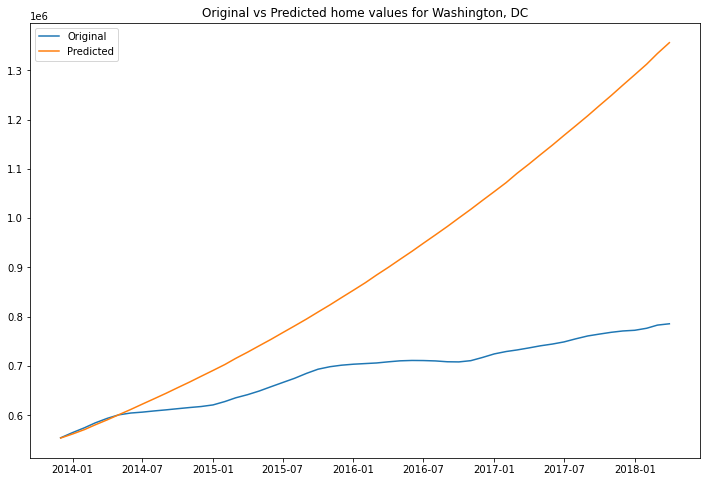

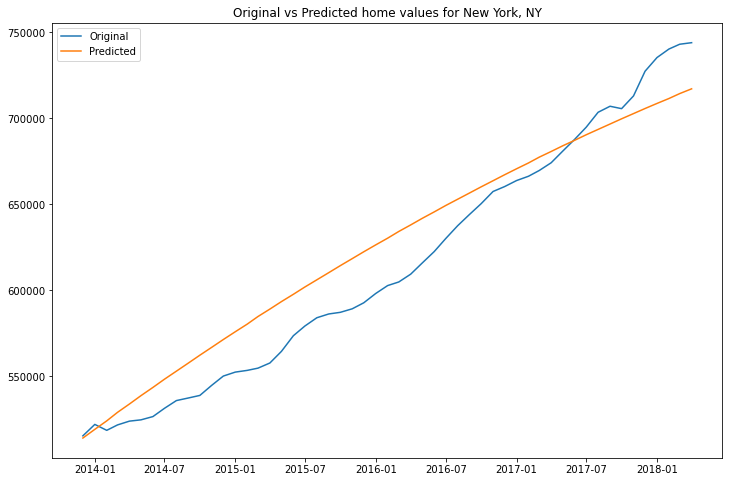

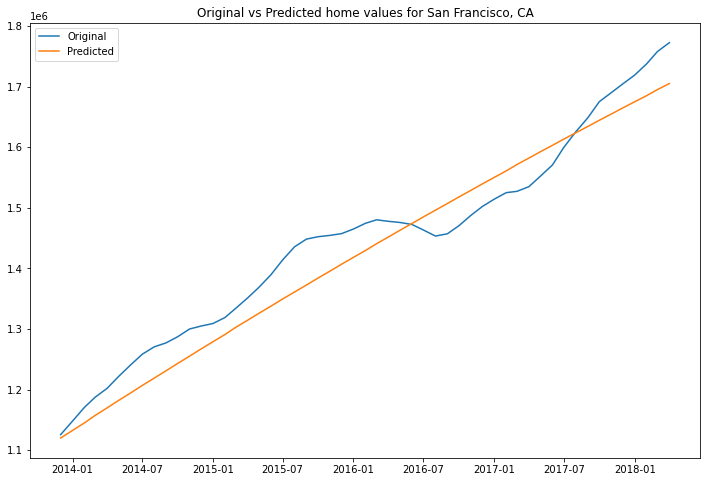

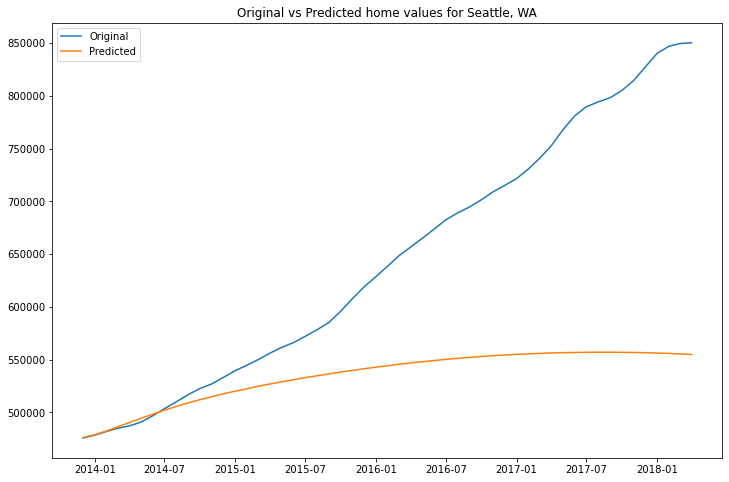

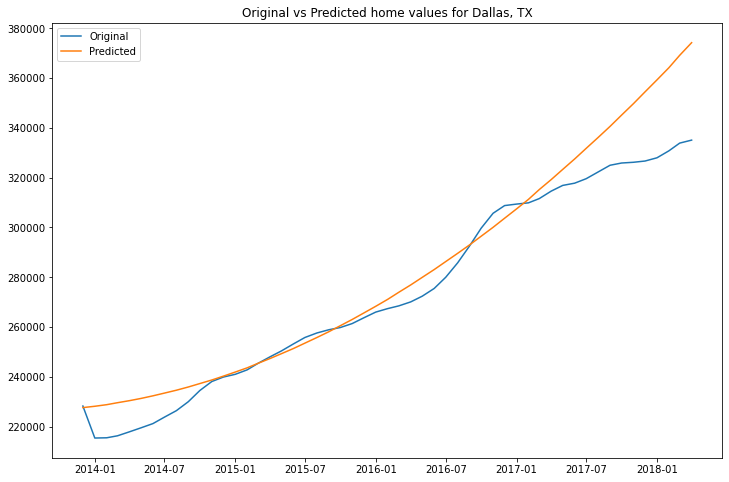

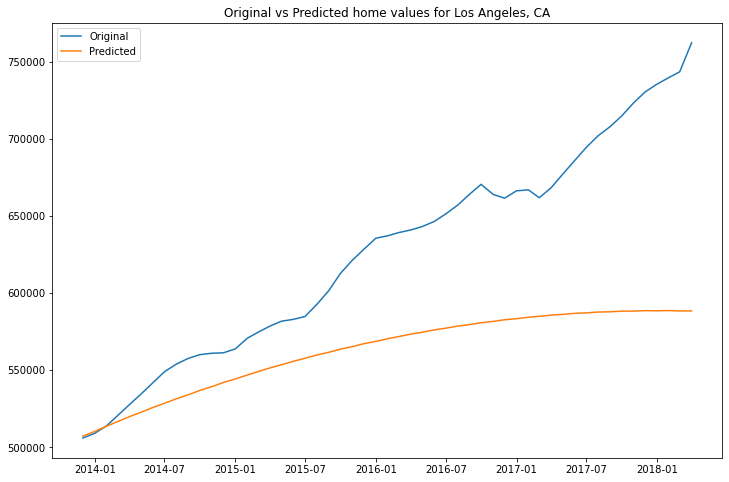

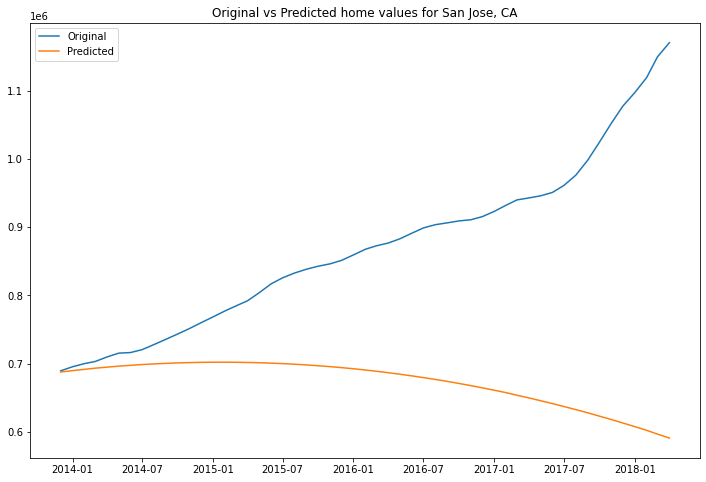

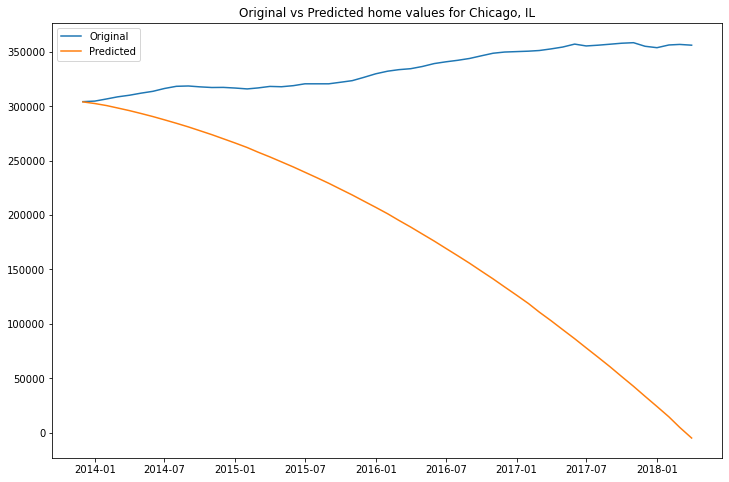

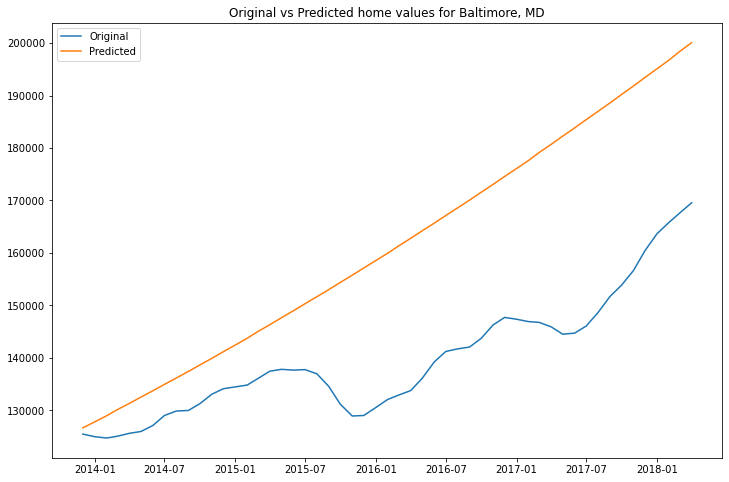

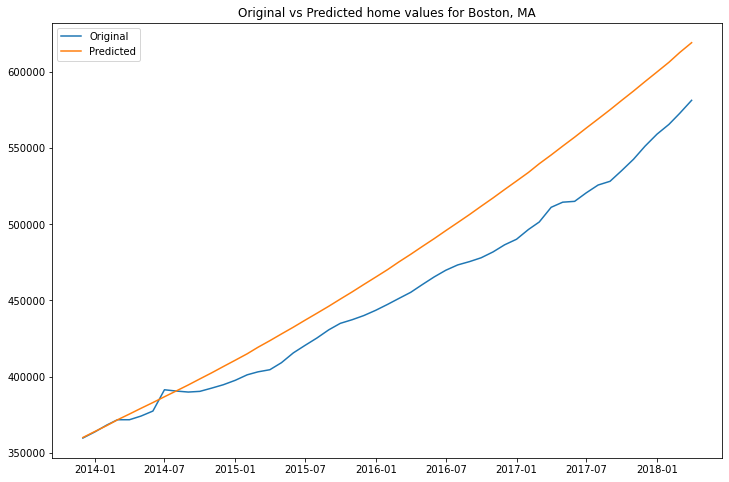

In [100]:
#3 useful graphs
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 2,3,2)
    city_model.plot(test)

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1663.701
Date:                Wed, 11 May 2022   AIC                           3345.402
Time:                        18:36:46   BIC                           3375.440
Sample:                    04-01-1996   HQIC                          3357.548
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9468      0.070    -13.510      0.000      -1.084      -0.809
ar.L2          0.4866      0.092      5.273      0.000       0.306       0.667
ar.L3          0.4736      0.095      5.008      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -2014.301
Date:                Wed, 11 May 2022   AIC                           4046.603
Time:                        18:36:47   BIC                           4076.641
Sample:                    04-01-1996   HQIC                          4058.749
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6740      3.154     -0.214      0.831      -6.856       5.508
ar.L2         -0.4961      0.516     -0.962      0.336      -1.507       0.514
ar.L3         -1.0433      1.983     -0.526      0.5

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:      San Francisco, CA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1994.833
Date:                Wed, 11 May 2022   AIC                           4007.665
Time:                        18:36:48   BIC                           4037.703
Sample:                    04-01-1996   HQIC                          4019.811
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6710      5.349     -0.312      0.755     -12.155       8.813
ar.L2         -1.3798      5.818     -0.237      0.813     -12.784      10.024
ar.L3         -0.4803      3.900     -0.123      0.9

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Seattle, WA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1742.329
Date:                Wed, 11 May 2022   AIC                           3502.659
Time:                        18:36:48   BIC                           3532.696
Sample:                    04-01-1996   HQIC                          3514.804
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5275      4.603     -0.115      0.909      -9.550       8.495
ar.L2         -0.3951      2.063     -0.192      0.848      -4.438       3.648
ar.L3         -0.8110      3.796     -0.214      0.8

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1604.401
Date:                Wed, 11 May 2022   AIC                           3226.803
Time:                        18:36:49   BIC                           3256.841
Sample:                    04-01-1996   HQIC                          3238.949
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1530      0.343     -3.357      0.001      -1.826      -0.480
ar.L2         -0.8679      0.144     -6.018      0.000      -1.151      -0.585
ar.L3         -0.1748      0.226     -0.773      0.4

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1966.007
Date:                Wed, 11 May 2022   AIC                           3950.015
Time:                        18:36:50   BIC                           3980.053
Sample:                    04-01-1996   HQIC                          3962.161
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.3184     19.369     -0.120      0.905     -40.281      35.644
ar.L2         -2.5819     33.425     -0.077      0.938     -68.095      62.931
ar.L3         -1.5867     30.809     -0.052      0.9

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           San Jose, CA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1915.869
Date:                Wed, 11 May 2022   AIC                           3849.737
Time:                        18:36:51   BIC                           3879.775
Sample:                    04-01-1996   HQIC                          3861.883
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4815      7.006      0.069      0.945     -13.250      14.213
ar.L2          0.6865      9.783      0.070      0.944     -18.488      19.861
ar.L3         -0.7798      4.093     -0.191      0.8

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1735.548
Date:                Wed, 11 May 2022   AIC                           3489.096
Time:                        18:36:51   BIC                           3519.134
Sample:                    04-01-1996   HQIC                          3501.242
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3283      0.119    -11.119      0.000      -1.562      -1.094
ar.L2          0.1867      0.094      1.988      0.047       0.003       0.371
ar.L3          0.6942      0.143      4.864      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1626.809
Date:                Wed, 11 May 2022   AIC                           3271.618
Time:                        18:36:52   BIC                           3301.656
Sample:                    04-01-1996   HQIC                          3283.764
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0799      0.053    -20.211      0.000      -1.185      -0.975
ar.L2         -0.5009      0.093     -5.379      0.000      -0.683      -0.318
ar.L3          0.1735      0.092      1.893      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1779.139
Date:                Wed, 11 May 2022   AIC                           3576.278
Time:                        18:36:53   BIC                           3606.315
Sample:                    04-01-1996   HQIC                          3588.423
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4305     42.734     -0.033      0.973     -85.187      82.326
ar.L2         -1.4789     21.579     -0.069      0.945     -43.772      40.815
ar.L3         -1.1429     43.220     -0.026      0.9

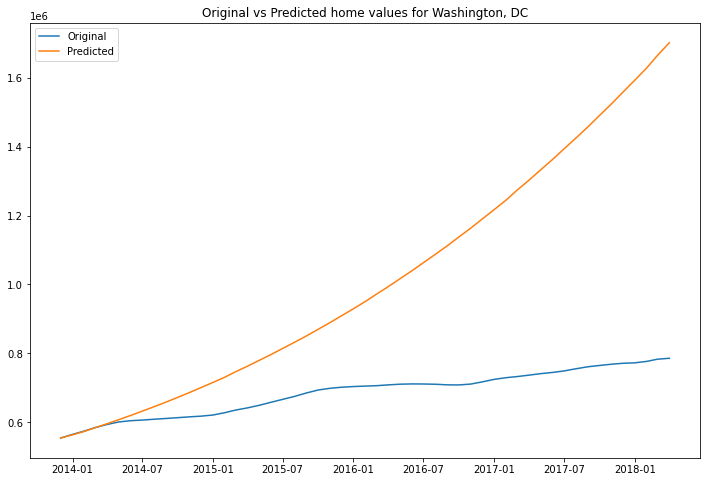

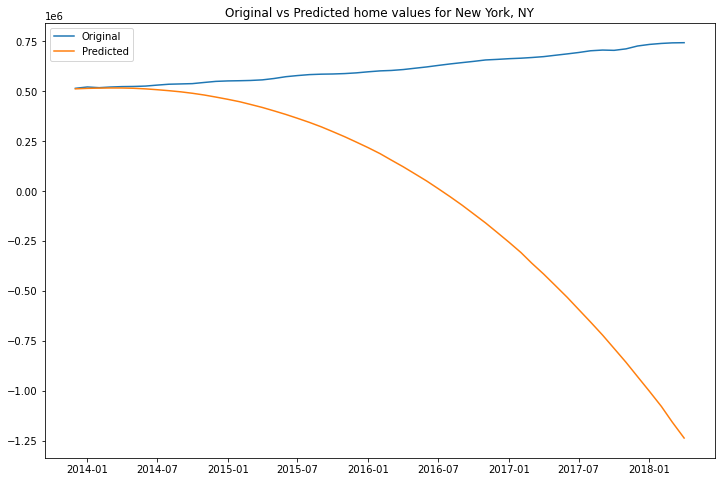

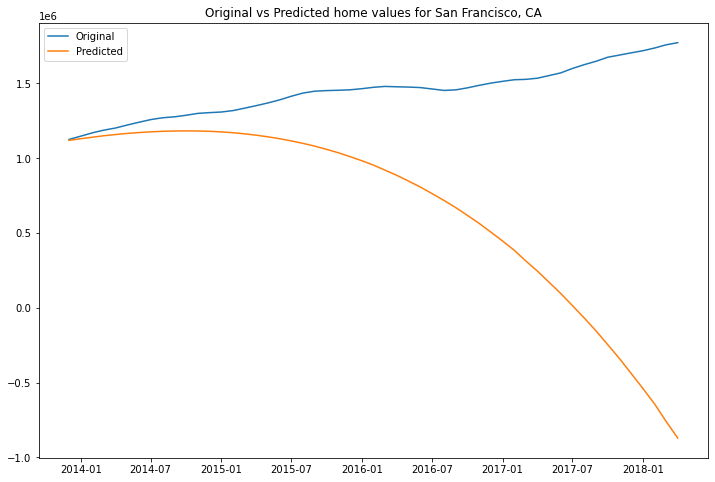

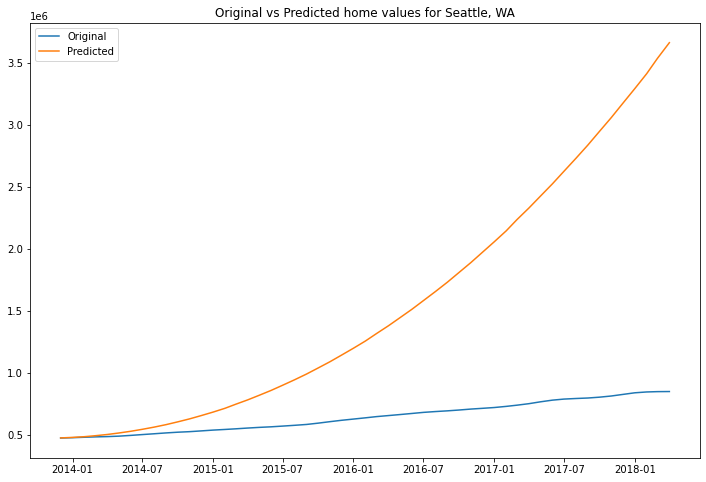

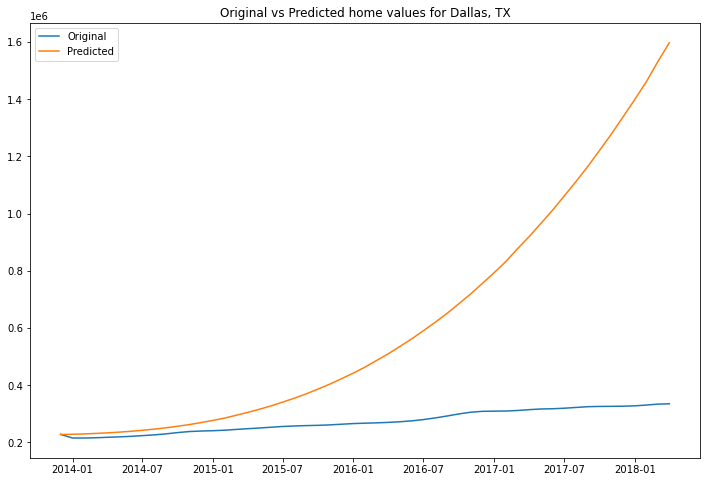

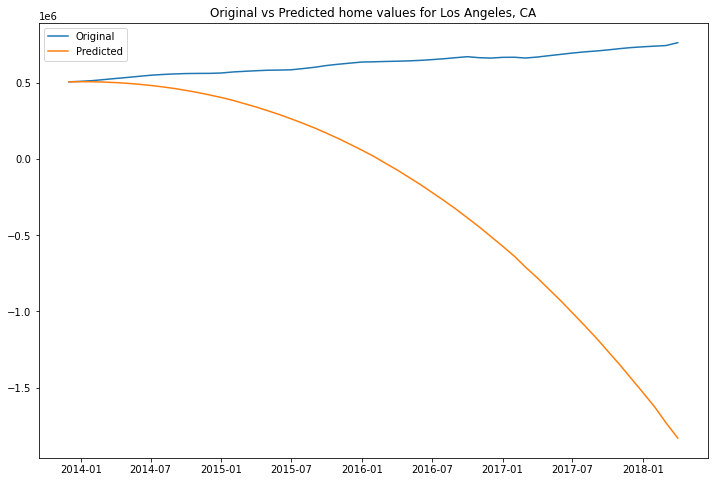

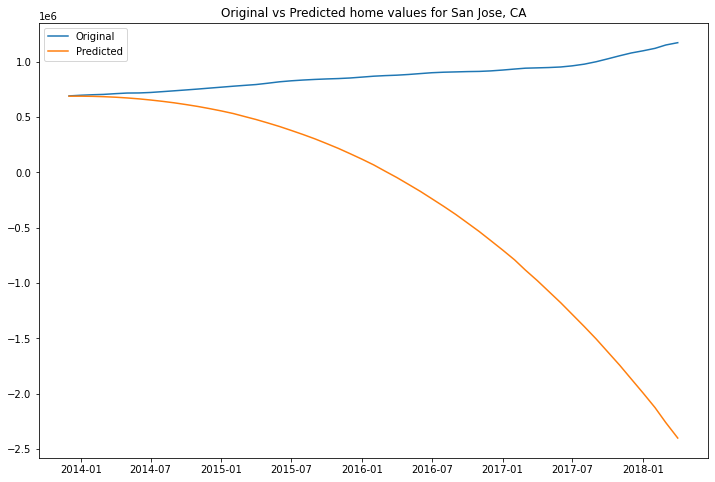

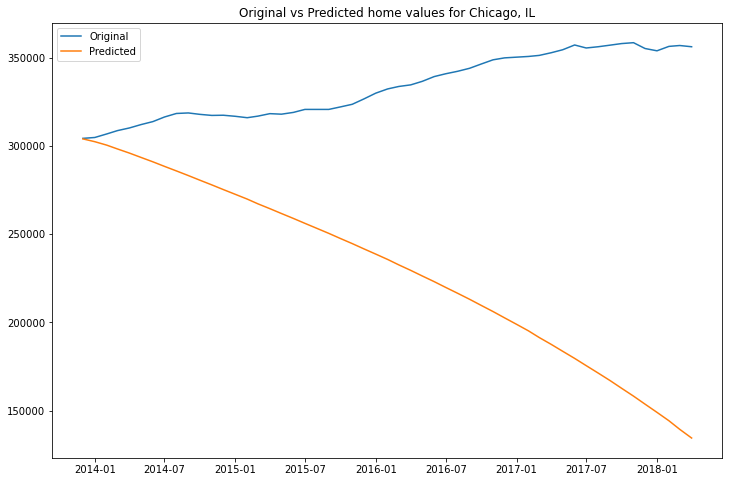

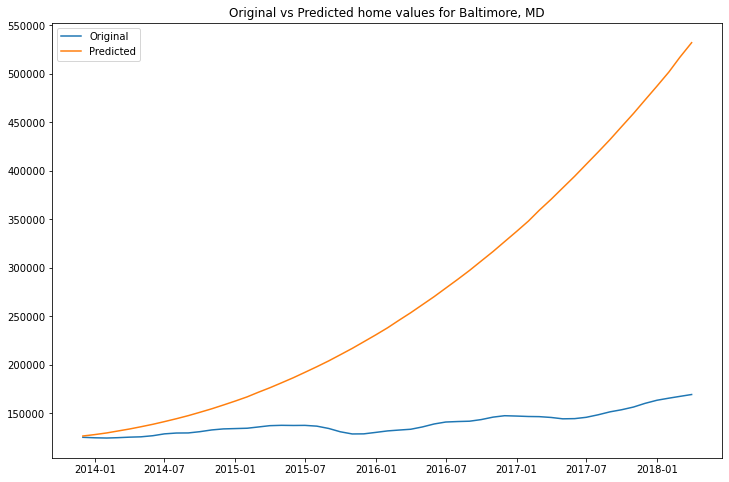

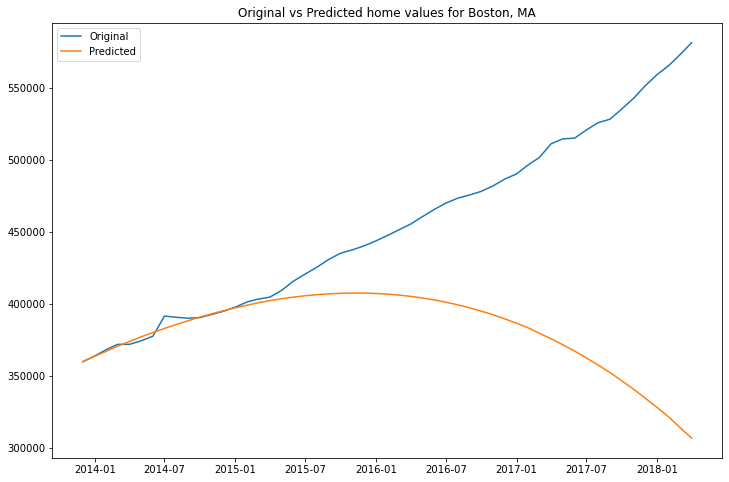

In [101]:
#not using this one
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 4,4,4)
    city_model.plot(test)

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1672.206
Date:                Wed, 11 May 2022   AIC                           3358.411
Time:                        18:36:57   BIC                           3381.808
Sample:                    04-01-1996   HQIC                          3367.871
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7175      0.440      1.629      0.103      -0.146       1.581
ar.L2          0.9450      0.727      1.299      0.194      -0.481       2.371
ar.L3         -0.7718      0.341     -2.267      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1967.256
Date:                Wed, 11 May 2022   AIC                           3948.511
Time:                        18:36:58   BIC                           3971.908
Sample:                    04-01-1996   HQIC                          3957.971
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5481      0.688     -2.251      0.024      -2.896      -0.200
ar.L2         -1.0144      0.673     -1.506      0.132      -2.334       0.305
ar.L3         -0.0590      0.050     -1.178      0.2

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1544.119
Date:                Wed, 11 May 2022   AIC                           3102.239
Time:                        18:36:59   BIC                           3125.635
Sample:                    04-01-1996   HQIC                          3111.698
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2583      0.080      3.225      0.001       0.101       0.415
ar.L2         -0.2438      0.065     -3.772      0.000      -0.371      -0.117
ar.L3          0.8789      0.068     12.910      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1924.674
Date:                Wed, 11 May 2022   AIC                           3863.347
Time:                        18:37:00   BIC                           3886.743
Sample:                    04-01-1996   HQIC                          3872.806
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5517      8.833     -0.176      0.861     -18.865      15.761
ar.L2         -0.8631      8.635     -0.100      0.920     -17.787      16.061
ar.L3         -0.0920      1.012     -0.091      0.9

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1630.098
Date:                Wed, 11 May 2022   AIC                           3274.196
Time:                        18:37:02   BIC                           3297.592
Sample:                    04-01-1996   HQIC                          3283.655
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7997      0.283      2.830      0.005       0.246       1.354
ar.L2          0.0229      0.251      0.091      0.927      -0.469       0.515
ar.L3         -0.0888      0.107     -0.829      0.4

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1759.462
Date:                Wed, 11 May 2022   AIC                           3532.925
Time:                        18:37:02   BIC                           3556.321
Sample:                    04-01-1996   HQIC                          3542.384
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7990      0.482     -1.658      0.097      -1.743       0.145
ar.L2         -0.0668      0.351     -0.190      0.849      -0.755       0.622
ar.L3          0.4050      0.273      1.483      0.1

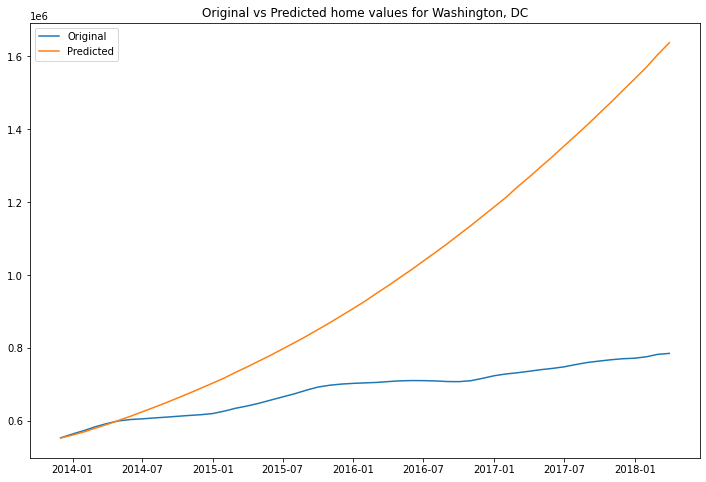

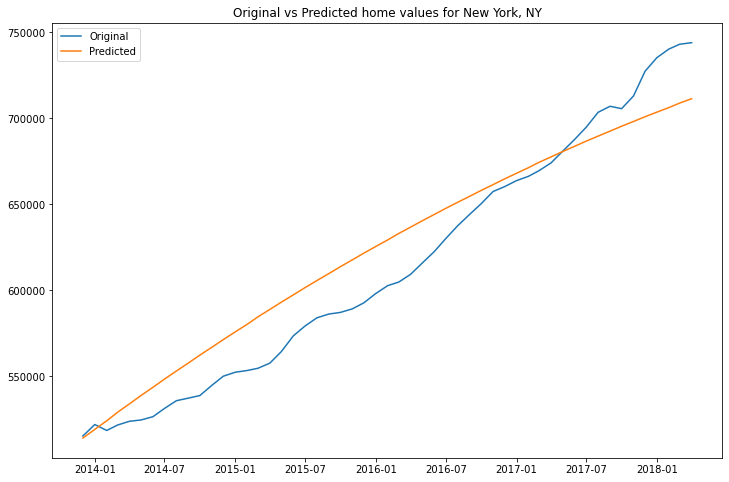

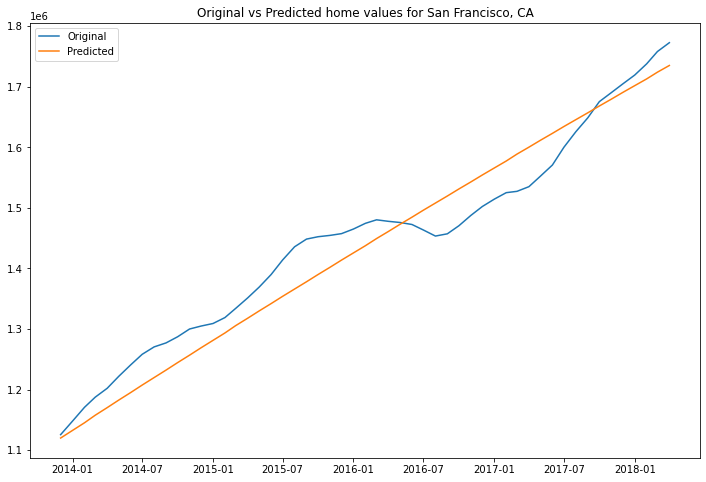

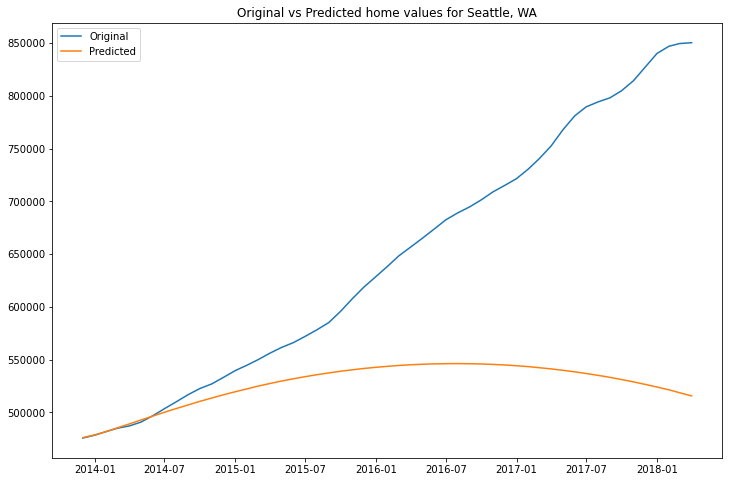

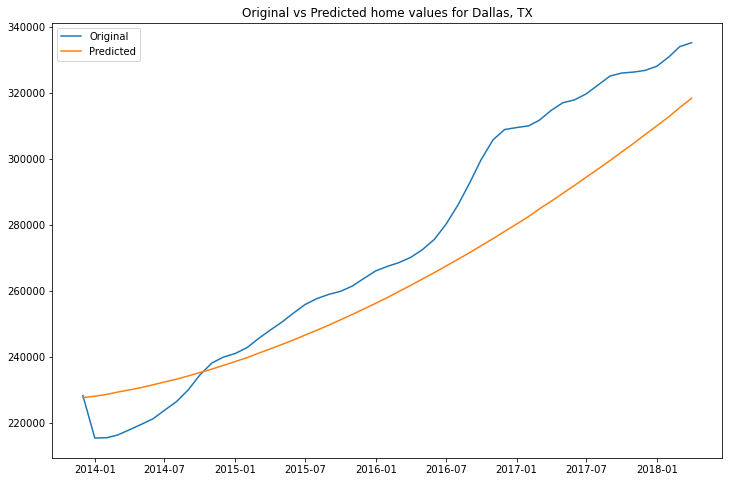

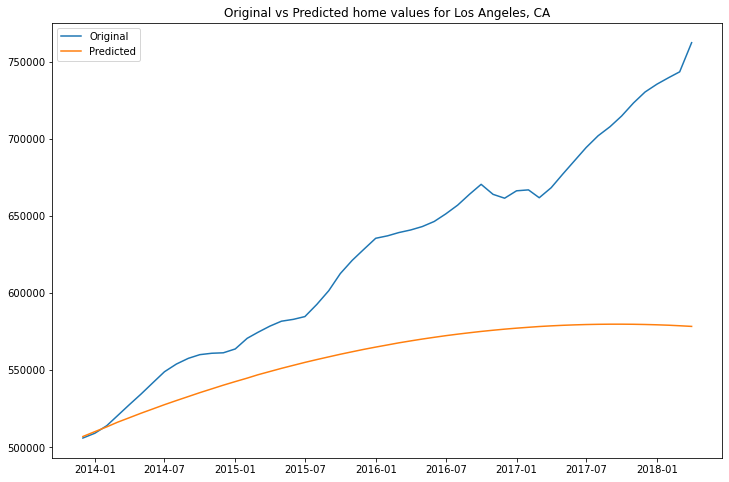

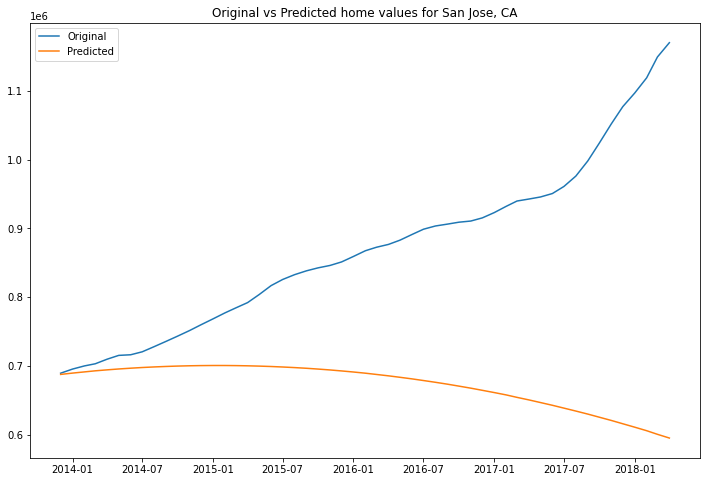

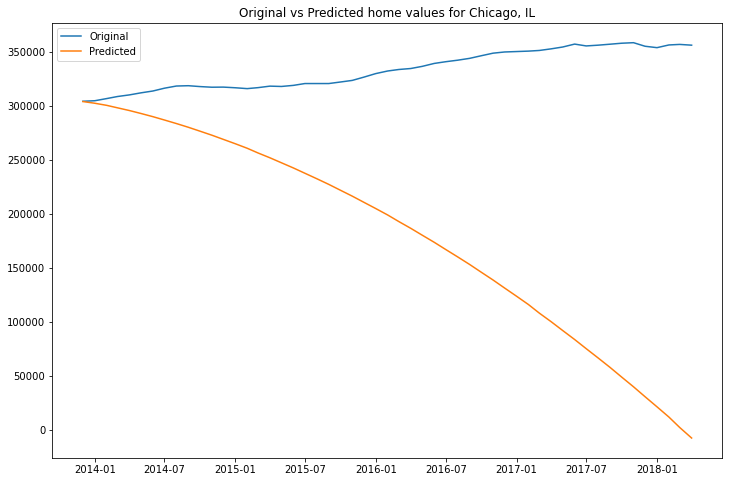

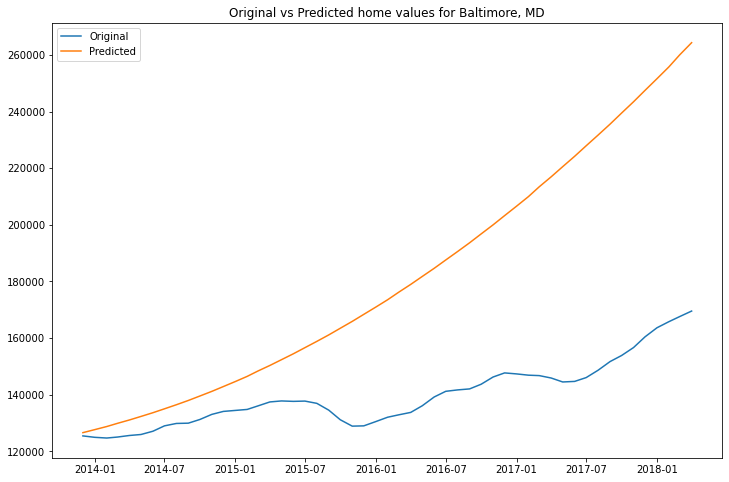

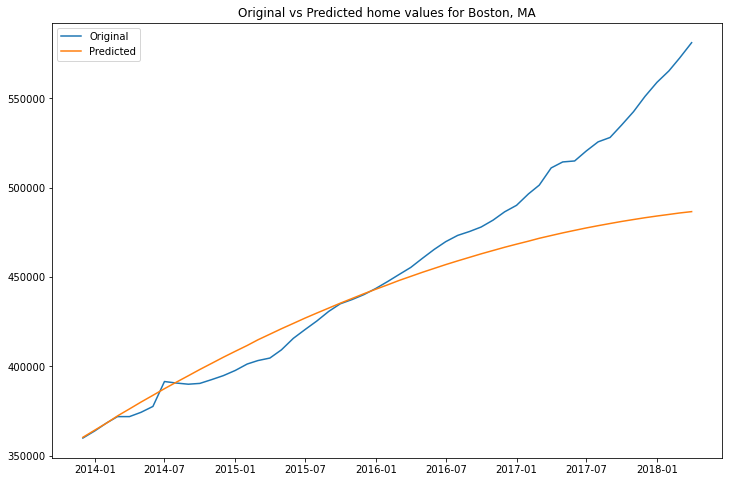

In [102]:
#4 useful graphs
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,3,3)
    city_model.plot(test)

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1672.873
Date:                Wed, 11 May 2022   AIC                           3361.746
Time:                        18:37:07   BIC                           3388.485
Sample:                    04-01-1996   HQIC                          3372.557
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0989      3.494     -0.028      0.977      -6.948       6.750
ar.L2          0.4911      0.779      0.630      0.528      -1.036       2.018
ar.L3          0.0040      1.177      0.003      0.9

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1963.899
Date:                Wed, 11 May 2022   AIC                           3943.797
Time:                        18:37:07   BIC                           3970.536
Sample:                    04-01-1996   HQIC                          3954.608
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0297      0.368     -2.796      0.005      -1.751      -0.308
ar.L2         -1.0660      0.032    -33.313      0.000      -1.129      -1.003
ar.L3         -0.9545      0.371     -2.575      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1543.172
Date:                Wed, 11 May 2022   AIC                           3102.343
Time:                        18:37:09   BIC                           3129.082
Sample:                    04-01-1996   HQIC                          3113.154
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5914      0.462     -1.279      0.201      -1.497       0.315
ar.L2         -0.8188      0.339     -2.415      0.016      -1.483      -0.154
ar.L3          0.1205      0.406      0.297      0.7

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1925.604
Date:                Wed, 11 May 2022   AIC                           3867.209
Time:                        18:37:09   BIC                           3893.947
Sample:                    04-01-1996   HQIC                          3878.019
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7322      1.526     -1.135      0.256      -4.724       1.259
ar.L2         -0.8879      1.694     -0.524      0.600      -4.208       2.432
ar.L3         -0.0439      0.226     -0.194      0.8

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1758.190
Date:                Wed, 11 May 2022   AIC                           3532.379
Time:                        18:37:12   BIC                           3559.118
Sample:                    04-01-1996   HQIC                          3543.190
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7063      0.151     -4.689      0.000      -1.002      -0.411
ar.L2         -0.3987      0.153     -2.615      0.009      -0.698      -0.100
ar.L3          0.4386      0.100      4.374      0.0

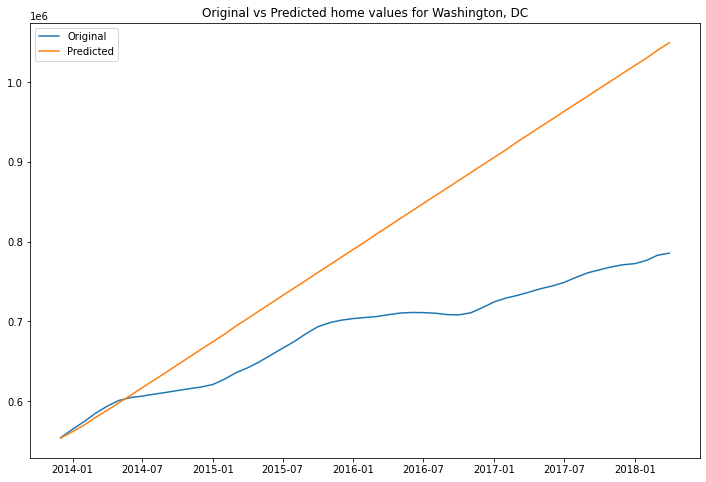

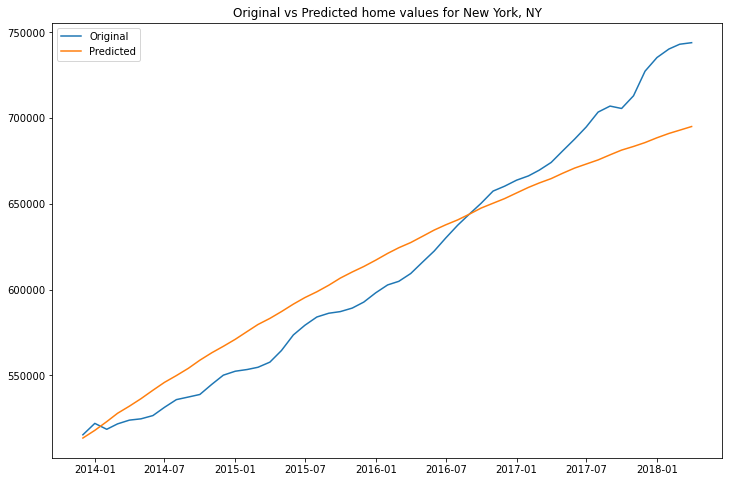

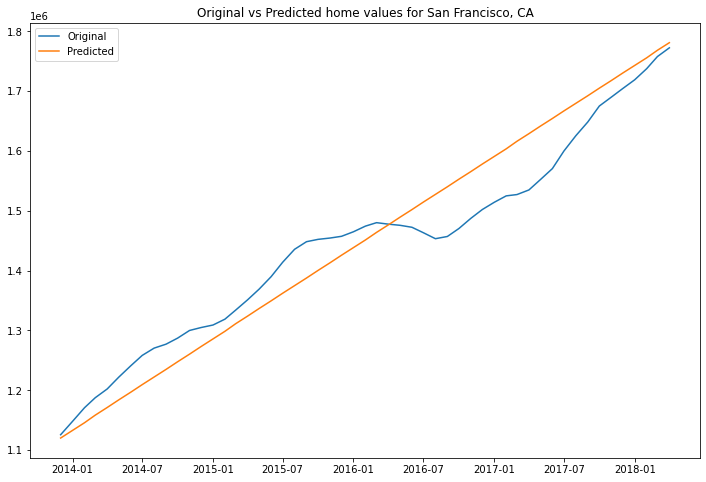

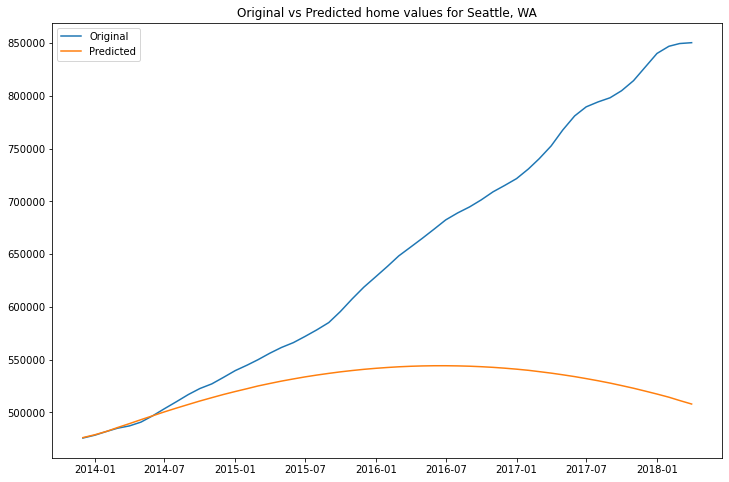

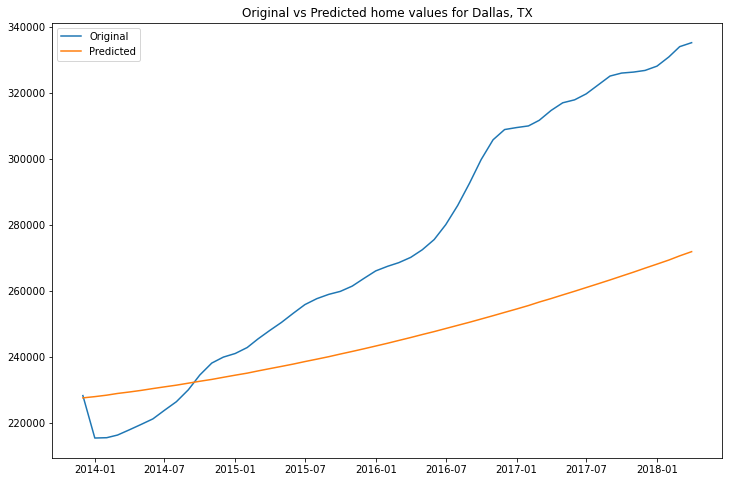

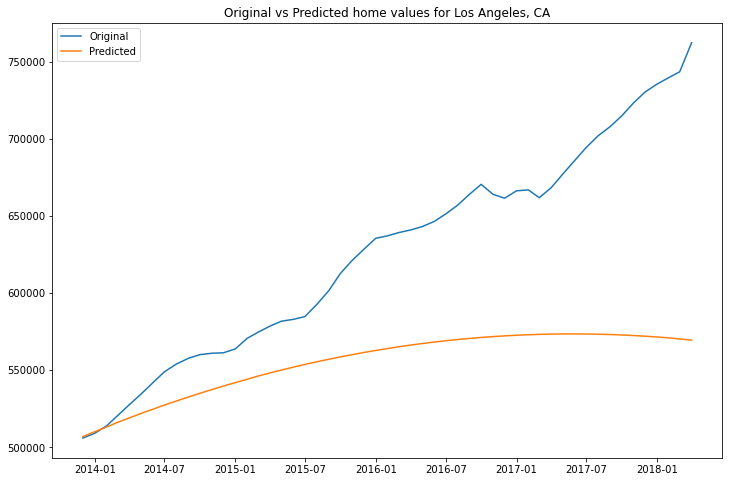

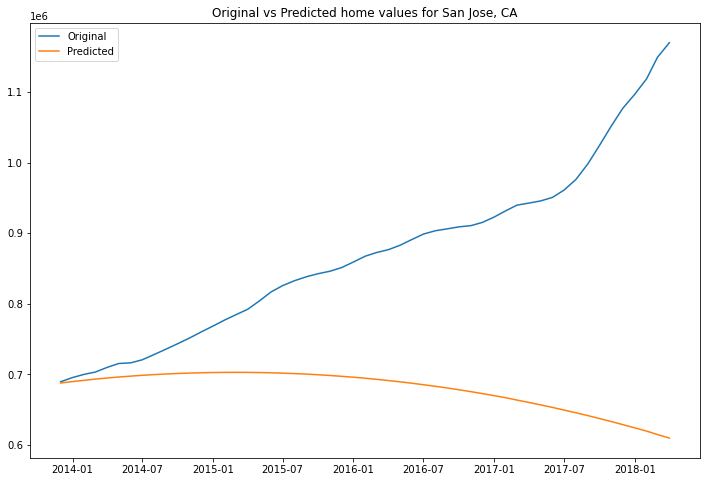

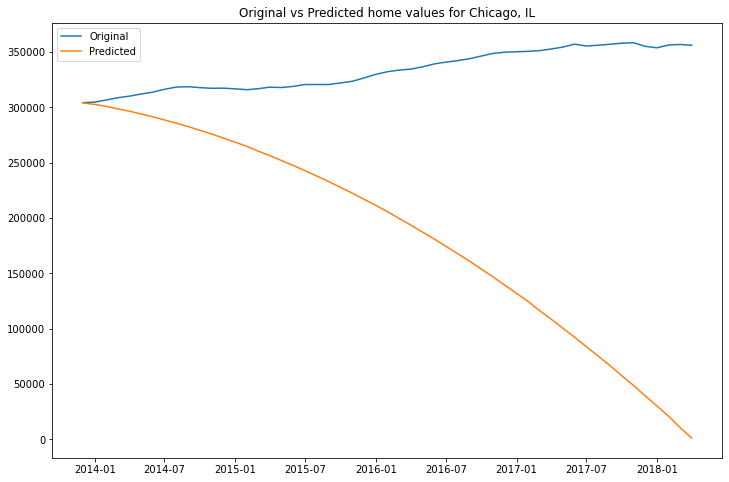

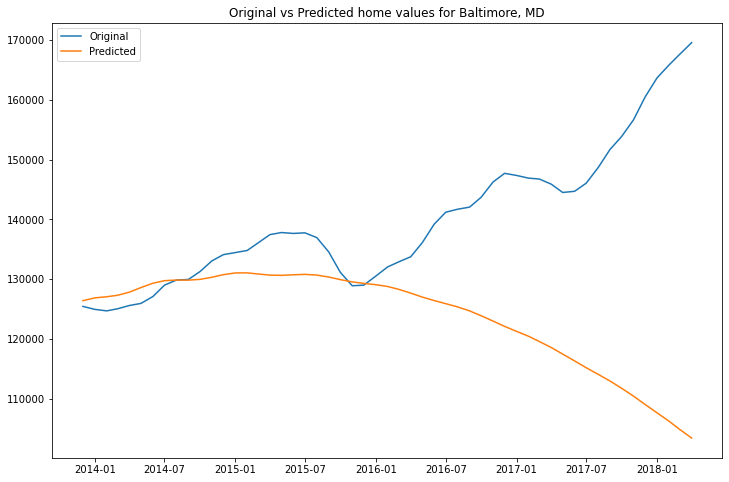

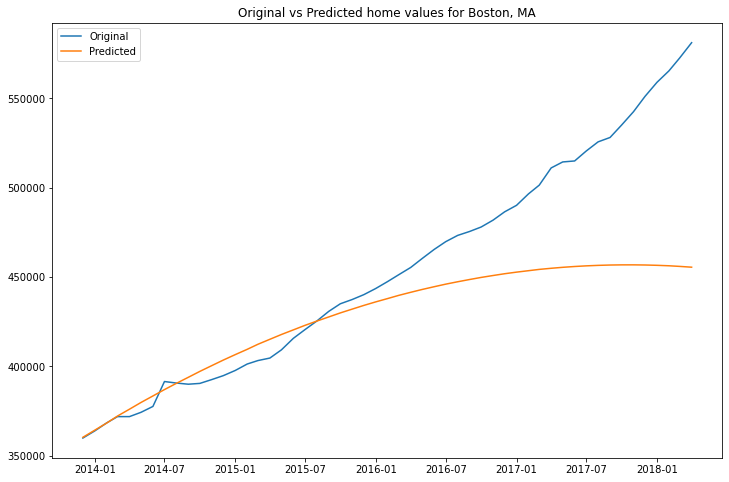

In [103]:
#3 good models
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,3,4)
    city_model.plot(test)

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1673.464
Date:                Wed, 11 May 2022   AIC                           3362.928
Time:                        18:37:16   BIC                           3389.667
Sample:                    04-01-1996   HQIC                          3373.739
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0063      0.533      0.012      0.991      -1.038       1.051
ar.L2          0.3073      0.383      0.802      0.422      -0.444       1.058
ma.L1         -0.2086      0.533     -0.392      0.6

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1966.495
Date:                Wed, 11 May 2022   AIC                           3948.989
Time:                        18:37:17   BIC                           3975.728
Sample:                    04-01-1996   HQIC                          3959.800
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4449      0.841     -0.529      0.597      -2.094       1.204
ar.L2         -0.7651      0.793     -0.965      0.334      -2.319       0.789
ma.L1         -0.6353      0.846     -0.751      0.4

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Seattle, WA   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1748.692
Date:                Wed, 11 May 2022   AIC                           3513.385
Time:                        18:37:18   BIC                           3540.123
Sample:                    04-01-1996   HQIC                          3524.195
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0224      0.158      0.142      0.887      -0.287       0.332
ar.L2         -0.8208      0.132     -6.241      0.000      -1.079      -0.563
ma.L1         -0.2667      0.161     -1.654      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1543.528
Date:                Wed, 11 May 2022   AIC                           3103.057
Time:                        18:37:19   BIC                           3129.796
Sample:                    04-01-1996   HQIC                          3113.867
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6303      0.065     -9.629      0.000      -0.759      -0.502
ar.L2         -0.8599      0.049    -17.703      0.000      -0.955      -0.765
ma.L1          0.5287      0.068      7.729      0.0

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1925.602
Date:                Wed, 11 May 2022   AIC                           3867.204
Time:                        18:37:19   BIC                           3893.942
Sample:                    04-01-1996   HQIC                          3878.014
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6953      1.016     -1.668      0.095      -3.687       0.296
ar.L2         -0.9116      0.987     -0.924      0.356      -2.846       1.023
ma.L1          0.5727      1.022      0.560      0.5

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1743.192
Date:                Wed, 11 May 2022   AIC                           3502.383
Time:                        18:37:21   BIC                           3529.122
Sample:                    04-01-1996   HQIC                          3513.194
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3643      0.469     -0.777      0.437      -1.283       0.554
ar.L2          0.5176      0.349      1.482      0.138      -0.167       1.202
ma.L1          0.0314      0.468      0.067      0.9

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1757.694
Date:                Wed, 11 May 2022   AIC                           3531.388
Time:                        18:37:22   BIC                           3558.127
Sample:                    04-01-1996   HQIC                          3542.199
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7953      0.657     -1.210      0.226      -2.083       0.493
ar.L2       4.338e-05      0.398      0.000      1.000      -0.780       0.780
ma.L1          0.3391      0.658      0.516      0.6

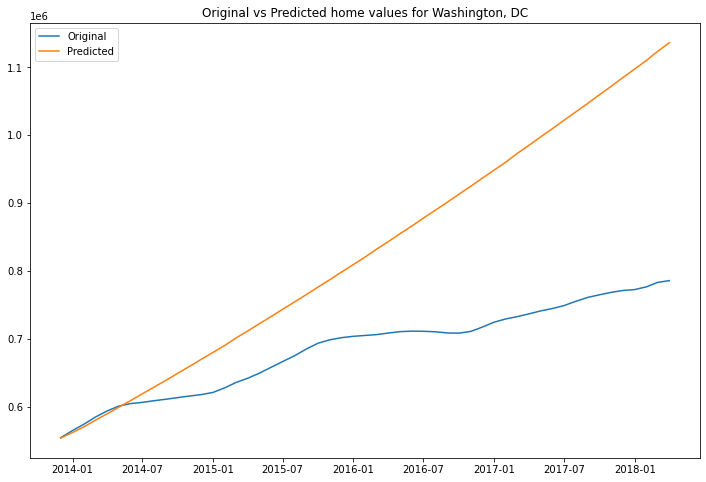

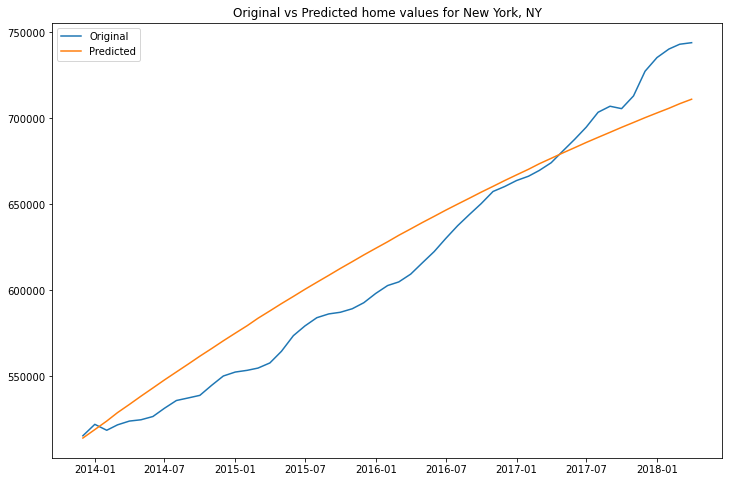

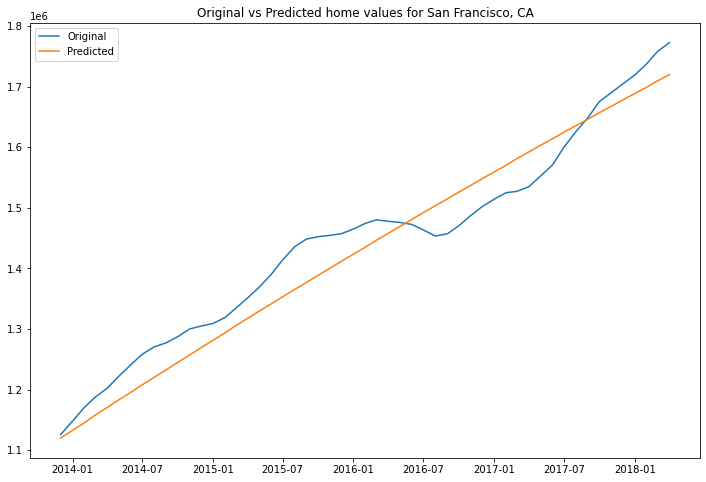

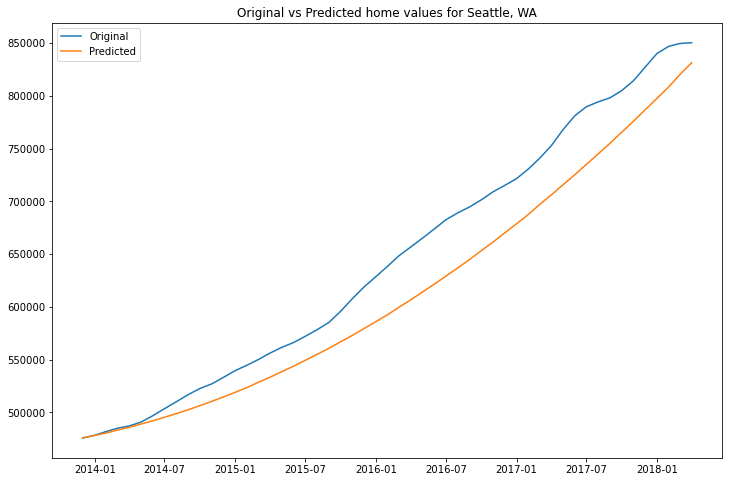

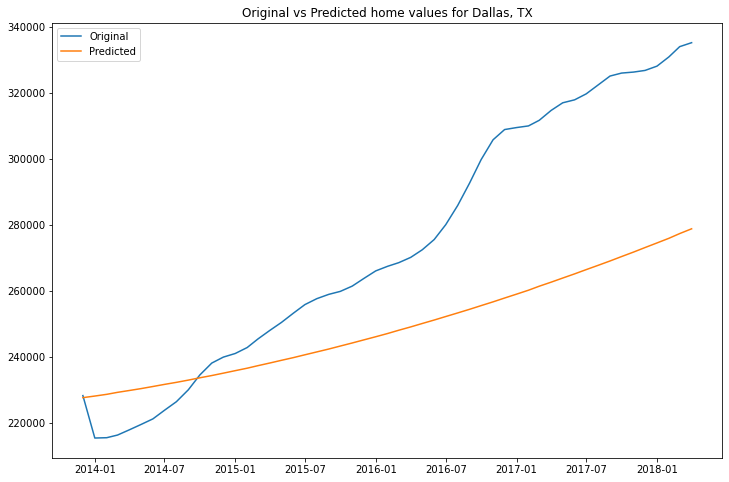

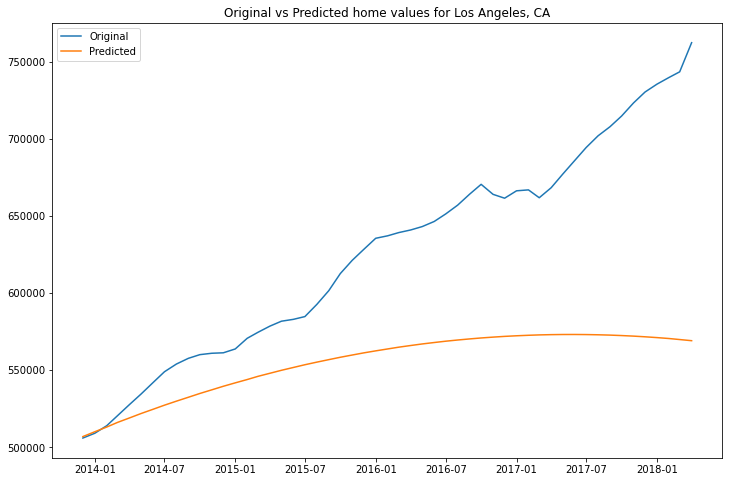

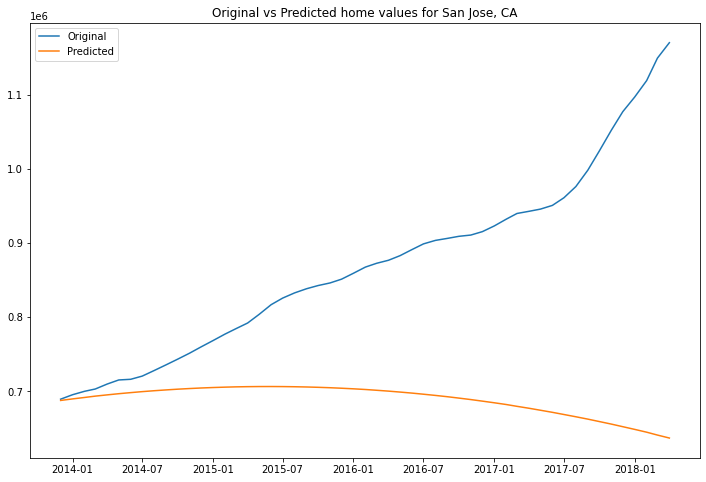

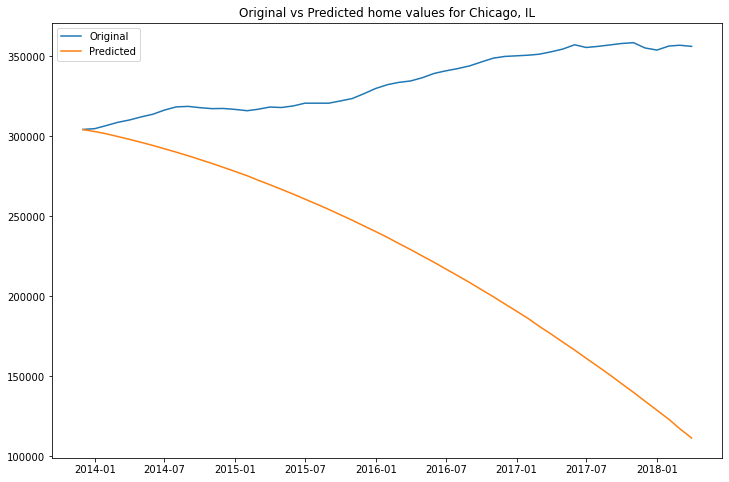

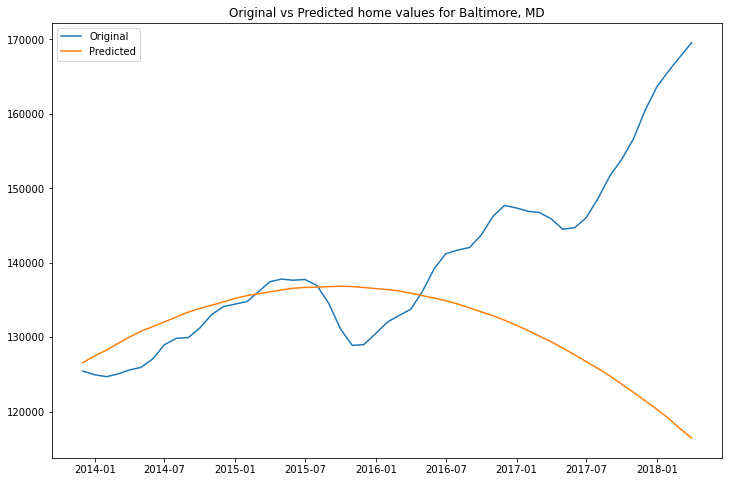

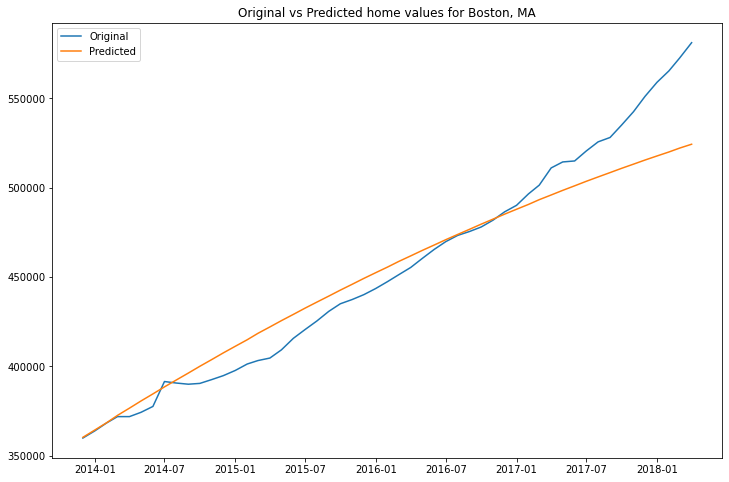

In [104]:
#Seattle works for this one.
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 2,3,5)
    city_model.plot(test)

### Forcasting home price with best model

In [105]:
forecast_mod = ARIMA(melted_df['Washington, DC'], order = [2,2,2]).fit()
forecasted_df = forecast_mod.forecast(steps=120)
forecasted_df

2018-05-01    7.884180e+05
2018-06-01    7.910868e+05
2018-07-01    7.937875e+05
2018-08-01    7.965231e+05
2018-09-01    7.992671e+05
2018-10-01    8.019863e+05
2018-11-01    8.046699e+05
2018-12-01    8.073373e+05
2019-01-01    8.100215e+05
2019-02-01    8.127399e+05
2019-03-01    8.154806e+05
2019-04-01    8.182129e+05
2019-05-01    8.209142e+05
2019-06-01    8.235890e+05
2019-07-01    8.262640e+05
2019-08-01    8.289652e+05
2019-09-01    8.316953e+05
2019-10-01    8.344326e+05
2019-11-01    8.371497e+05
2019-12-01    8.398374e+05
2020-01-01    8.425115e+05
2020-02-01    8.451991e+05
2020-03-01    8.479150e+05
2020-04-01    8.506494e+05
2020-05-01    8.533772e+05
2020-06-01    8.560795e+05
2020-07-01    8.587598e+05
2020-08-01    8.614401e+05
2020-09-01    8.641417e+05
2020-10-01    8.668673e+05
2020-11-01    8.695990e+05
2020-12-01    8.723144e+05
2021-01-01    8.750054e+05
2021-02-01    8.776850e+05
2021-03-01    8.803755e+05
2021-04-01    8.830893e+05
2021-05-01    8.858186e+05
2

Text(0.5, 1.0, 'Forecasted home values for Washington, DC')

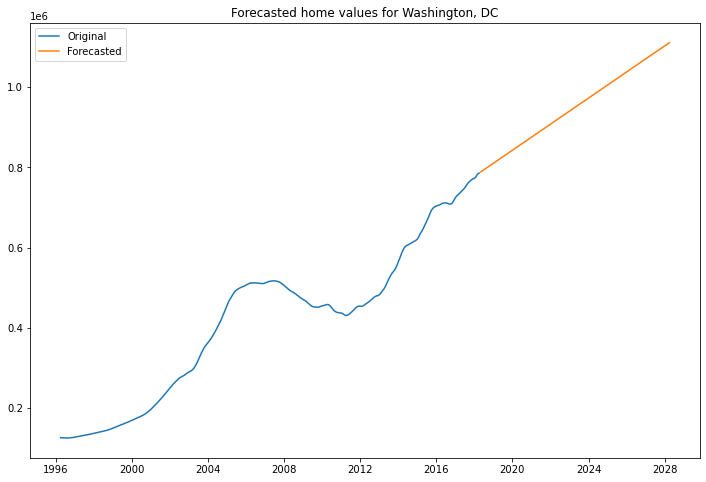

In [106]:
fig, ax = plt.subplots(figsize = (12,8)) 
ax.plot(melted_df['Washington, DC'])
ax.plot(forecasted_df)
ax.legend(['Original', 'Forecasted'])
ax.set_title(f'Forecasted home values for Washington, DC')

In [107]:
#We created an empty dictionary for our predictions 

predictions_dict = {}

#We are running a for-loop where we add the forecast to the dictionary, for every city.
for city in city_list: 
    forecast_mod = ARIMA(melted_df[city], order = [3,2,2]).fit()
    predictions_dict[city] = forecast_mod.forecast(steps=36)
    
predictions_dict    

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



{'Washington, DC': 2018-05-01    788274.768817
 2018-06-01    790830.905362
 2018-07-01    793448.648921
 2018-08-01    796143.110827
 2018-09-01    798922.694756
 2018-10-01    801789.966158
 2018-11-01    804742.368800
 2018-12-01    807773.098494
 2019-01-01    810872.080907
 2019-02-01    814026.986409
 2019-03-01    817224.221678
 2019-04-01    820449.847645
 2019-05-01    823690.384600
 2019-06-01    826933.476975
 2019-07-01    830168.401902
 2019-08-01    833386.416369
 2019-09-01    836580.947298
 2019-10-01    839747.636753
 2019-11-01    842884.260611
 2019-12-01    845990.543220
 2020-01-01    849067.893023
 2020-02-01    852119.084799
 2020-03-01    855147.913387
 2020-04-01    858158.841774
 2020-05-01    861156.663401
 2020-06-01    864146.194978
 2020-07-01    867132.012067
 2020-08-01    870118.235643
 2020-09-01    873108.373895
 2020-10-01    876105.219915
 2020-11-01    879110.802815
 2020-12-01    882126.387266
 2021-01-01    885152.514532
 2021-02-01    888189.076

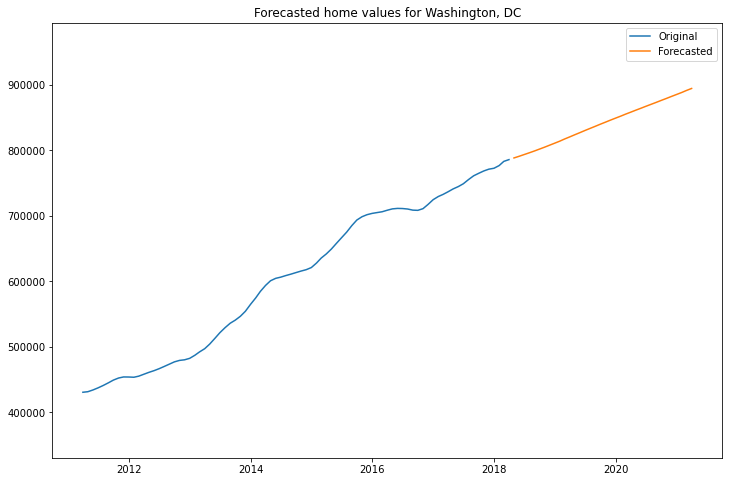

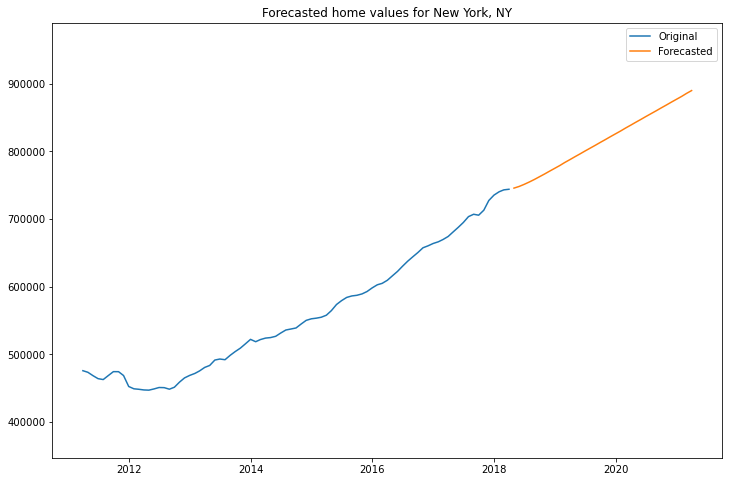

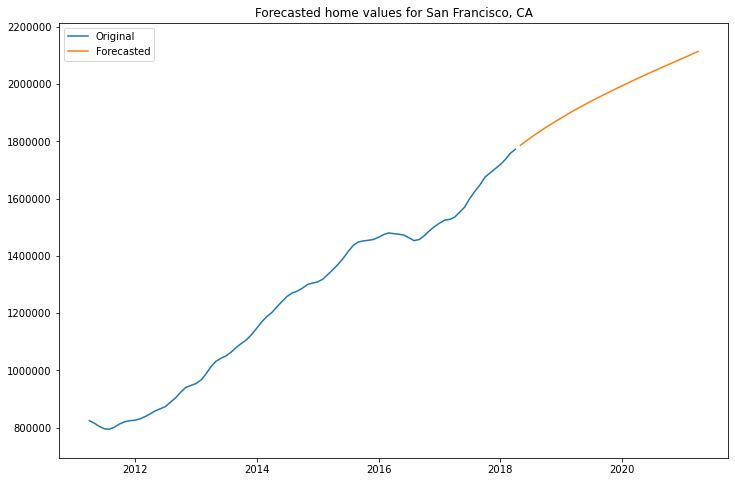

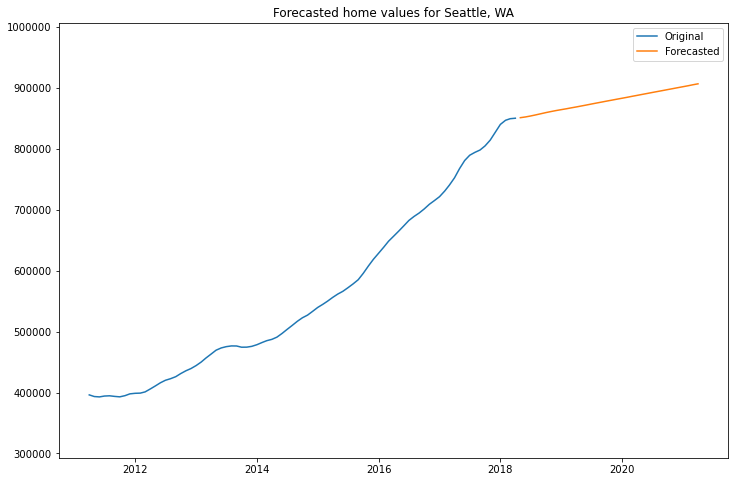

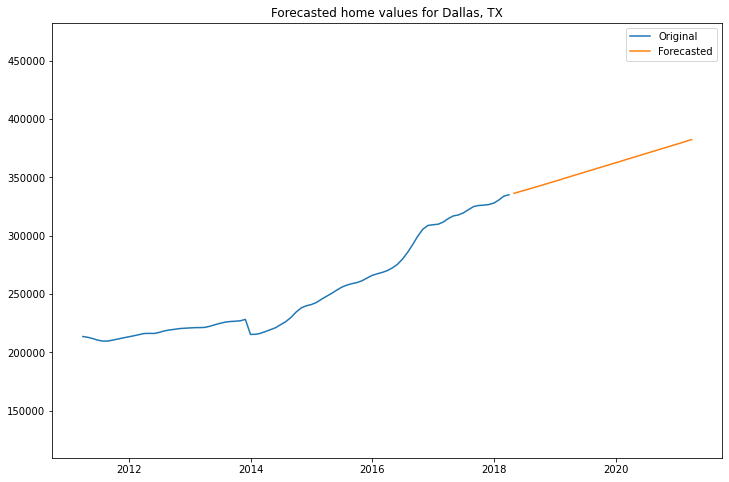

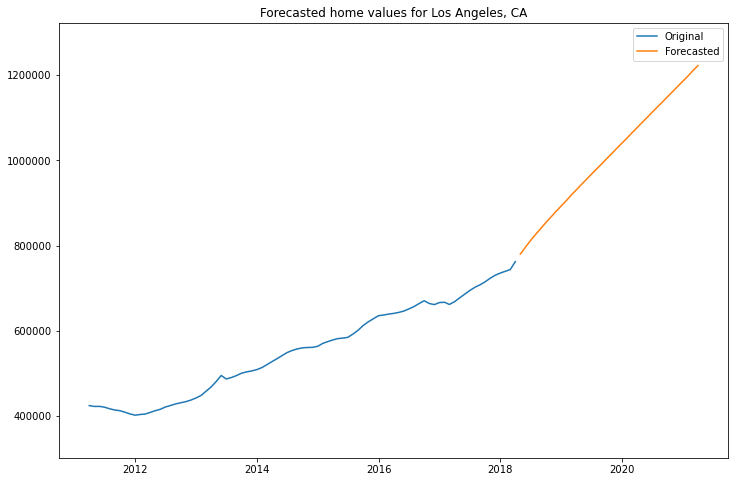

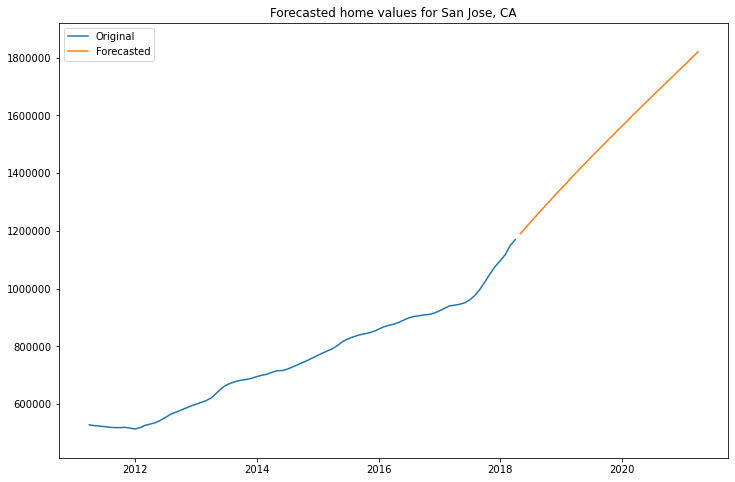

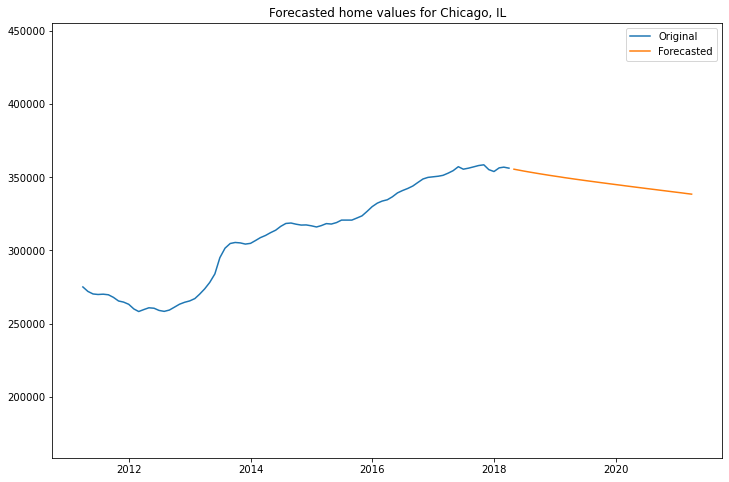

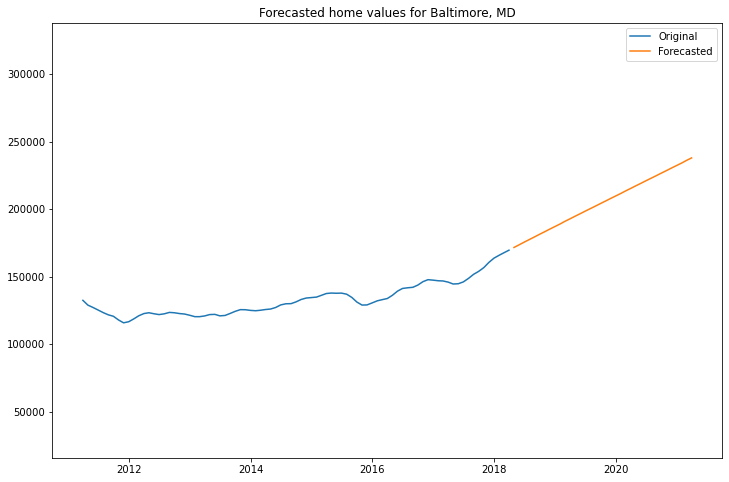

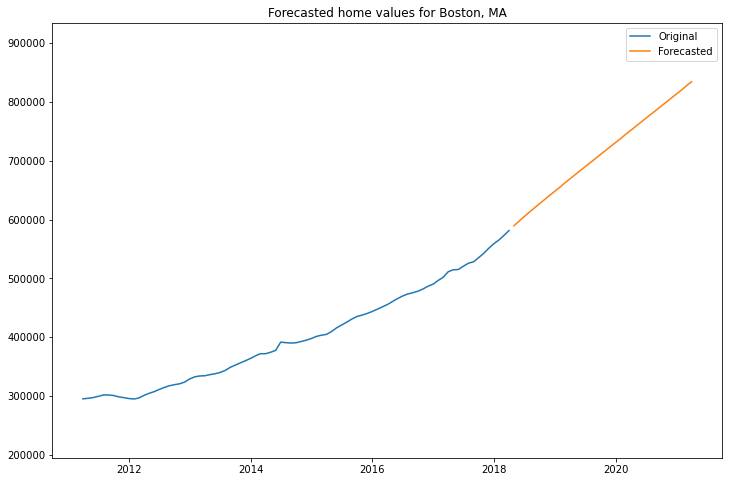

In [108]:
#We made a for loop that creates a graph that makes a prediction on home prices.


for city, predictions in predictions_dict.items():
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(melted_df[180:][city])
    ax.plot(predictions)
    ax.legend(['Original', 'Forecasted'])
    ax.set_title(f'Forecasted home values for {city}')
    ax.ticklabel_format(axis='y',style='plain')
    ax.set_ylim([min(melted_df[180:][city]-100000),max(predictions)+100000])
    plt.show()


Let's calculate the forcasted return for the next 3 year.

In [110]:
forcasted_return = {}
for city in city_list:
    forcast_return = ((predictions_dict[city][-1]/melted_df[city][-1])*100) -100
    forcasted_return[city]=forcast_return
    
forcasted_return = pd.DataFrame.from_dict(forcasted_return, orient='index')
forcasted_return.reset_index(inplace=True)
forcasted_return.rename({0:'Percent Return in 3 years','index':'City'},inplace=True, axis=1)
forcasted_return

City  Percent Return in 3 years
0     Washington, DC                  13.813610
1       New York, NY                  19.608448
2  San Francisco, CA                  19.267016
3        Seattle, WA                   6.642549
4         Dallas, TX                  14.109990
5    Los Angeles, CA                  60.310244
6       San Jose, CA                  55.592197
7        Chicago, IL                  -4.986449
8      Baltimore, MD                  40.320814
9         Boston, MA                  43.529624

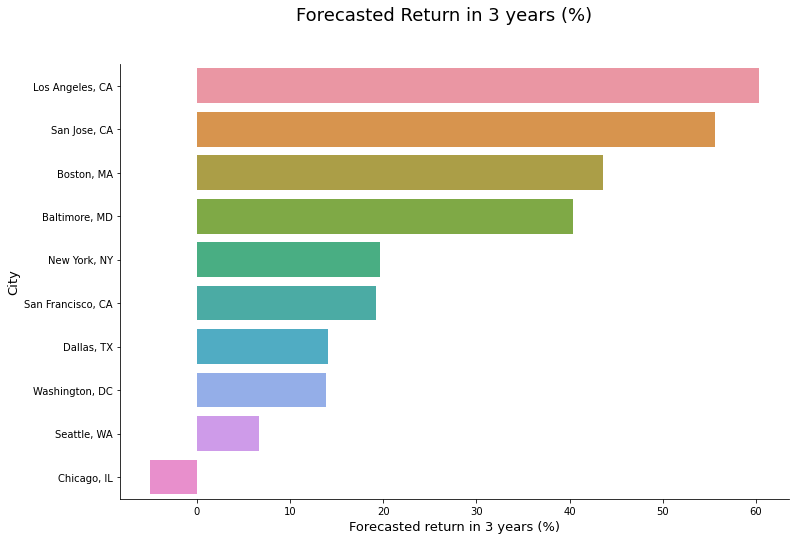

In [111]:
fig, ax = plt.subplots(figsize=(12,8))
forcasted_sort = forcasted_return.sort_values('Percent Return in 3 years',ascending = False)
sns.set_palette("husl")
sns.barplot(x='Percent Return in 3 years', y='City', data=forcasted_sort)
sns.despine()
fig.suptitle("Forecasted Return in 3 years (%)", fontsize = 18)
ax.set_xlabel("Forecasted return in 3 years (%)", fontsize = 13)
ax.set_ylabel("City", fontsize = 13)
plt.savefig('figures/forecast_return.png', transparent=True,bbox_inches="tight", dpi=500)

Based on our forcast results, the top 5 cities that we would recommend investing in would be...

## Conclusion